## Healthcate Dateset - exploratory data analysis
* Author : Ahmed Essam
* date : 9/8/2025
### introduction :-
- in the project ,we analyze a healthcare dateset containing patient demographics , medical conditions , billing information and rest results
- the goal is to uncover trands , detect anomalies and identify relationships between differnt attributes such as age , gender , admission type and billing amount

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# loading data from a CSV file
data = pd.read_csv('D:\\dataAnalysisPython\\test\\pro1\\healthcare_dataset.csv')
# display the first five rows
data.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
# some information about the table
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
# statistical summary of the table
print(data.describe())

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


In [5]:
# to find missing data
print(data.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


0


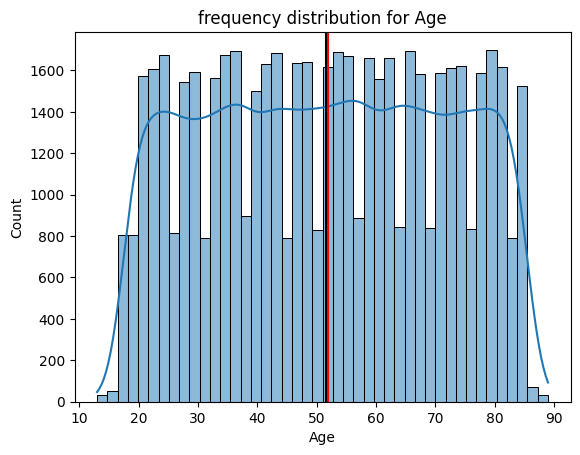

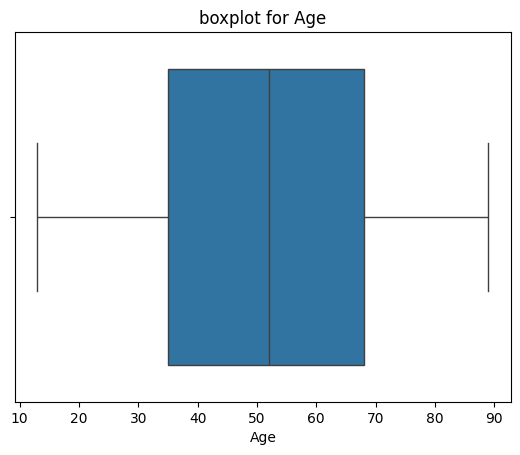

0


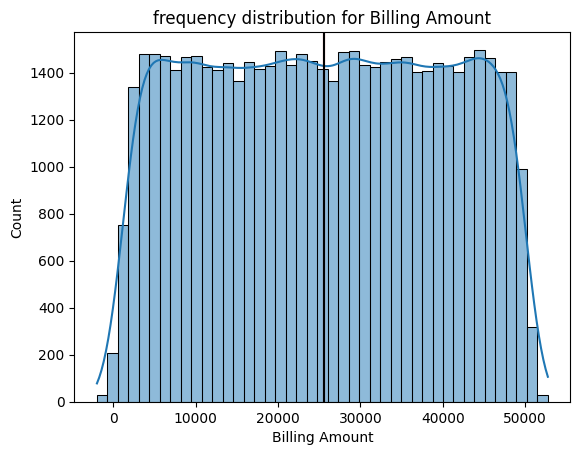

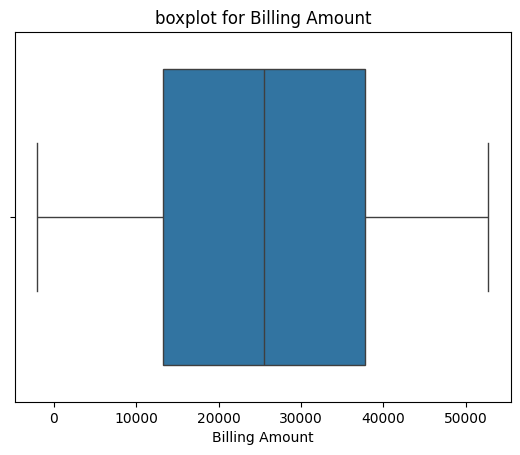

In [6]:
cols = ['Age' , 'Billing Amount']
# a function for identifying outliers
def detect_outliers(col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - iqr * 1.5
    ub = q3 + iqr * 1.5
    outliers = data[(data[col] < lb) | (data[col] > ub)]
    print(len(outliers))
def plot_distribution(col):
    # frequency distribution chart
    sns.histplot(data = data , x = col ,kde=True)
    plt.axvline(data[col].median() , color = 'red')
    plt.axvline(data[col].mean() , color = 'black')
    plt.title(f'frequency distribution for {col}')
    plt.show()
    # Box-plot
    sns.boxplot(data = data , x= col)
    plt.title(f'boxplot for {col}')
    plt.show()
for col in cols :
    detect_outliers(col)
    plot_distribution(col)

In [7]:
# Convert the 'Date of Admission' column to datetime and add columns for admission days, months, and years
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['day_Admission'] = data['Date of Admission'].dt.day
data['month_Admission'] = data['Date of Admission'].dt.month
data['year_Admission'] = data['Date of Admission'].dt.year
data['week_Admission'] = data['Date of Admission'].dt.day_name()
# Convert the 'Discharge Date' column to datetime and add columns for discharge days, months, and years
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])
data['day_Discharge'] = data['Discharge Date'].dt.day
data['month_Discharge'] = data['Discharge Date'].dt.month
data['year_Discharge'] = data['Discharge Date'].dt.year
data['week_Discharge'] = data['Discharge Date'].dt.day_name()

count Gender : 
 Gender
Female    27726
Male      27774
Name: count, dtype: int64


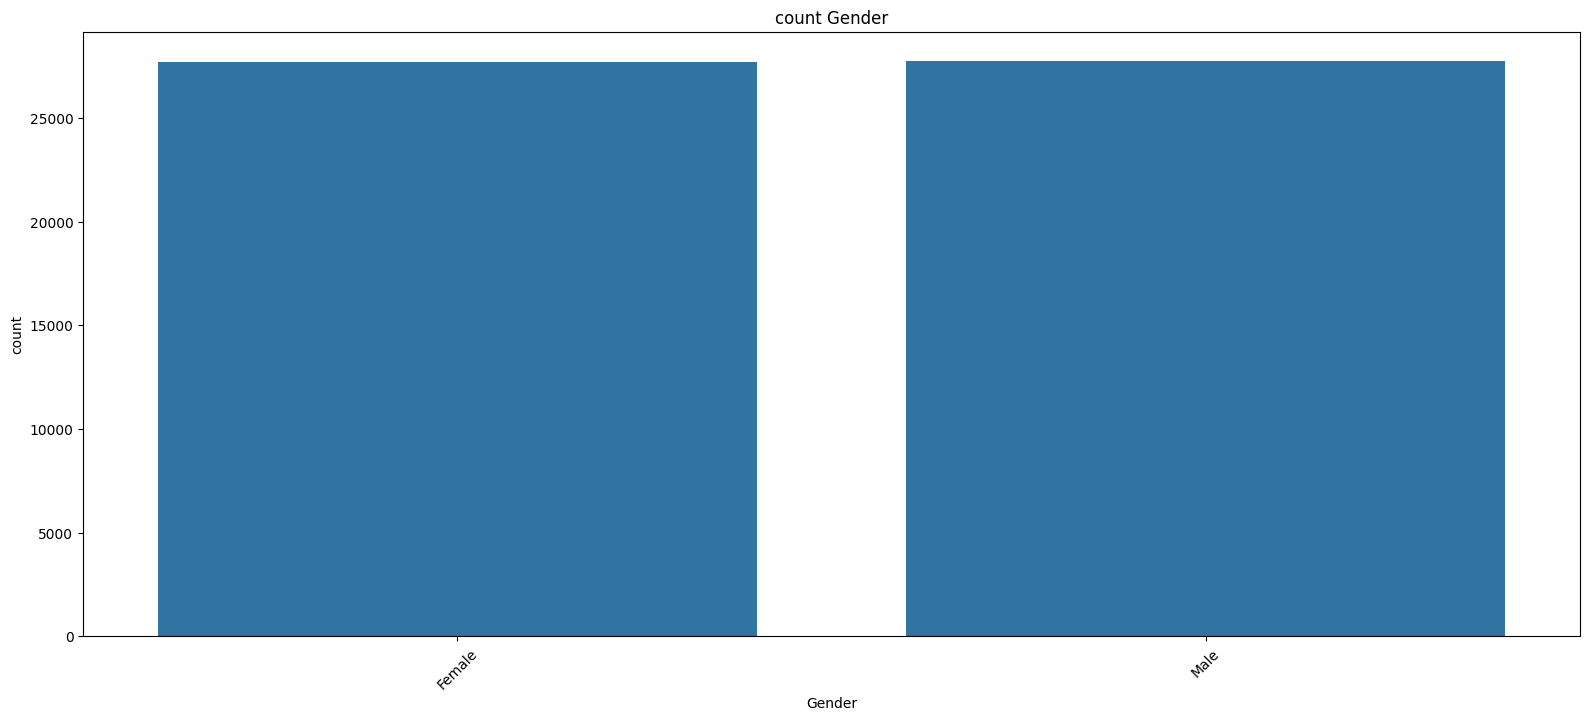

count Blood Type : 
 Blood Type
O-     6877
O+     6917
B-     6944
AB-    6945
B+     6945
AB+    6947
A+     6956
A-     6969
Name: count, dtype: int64


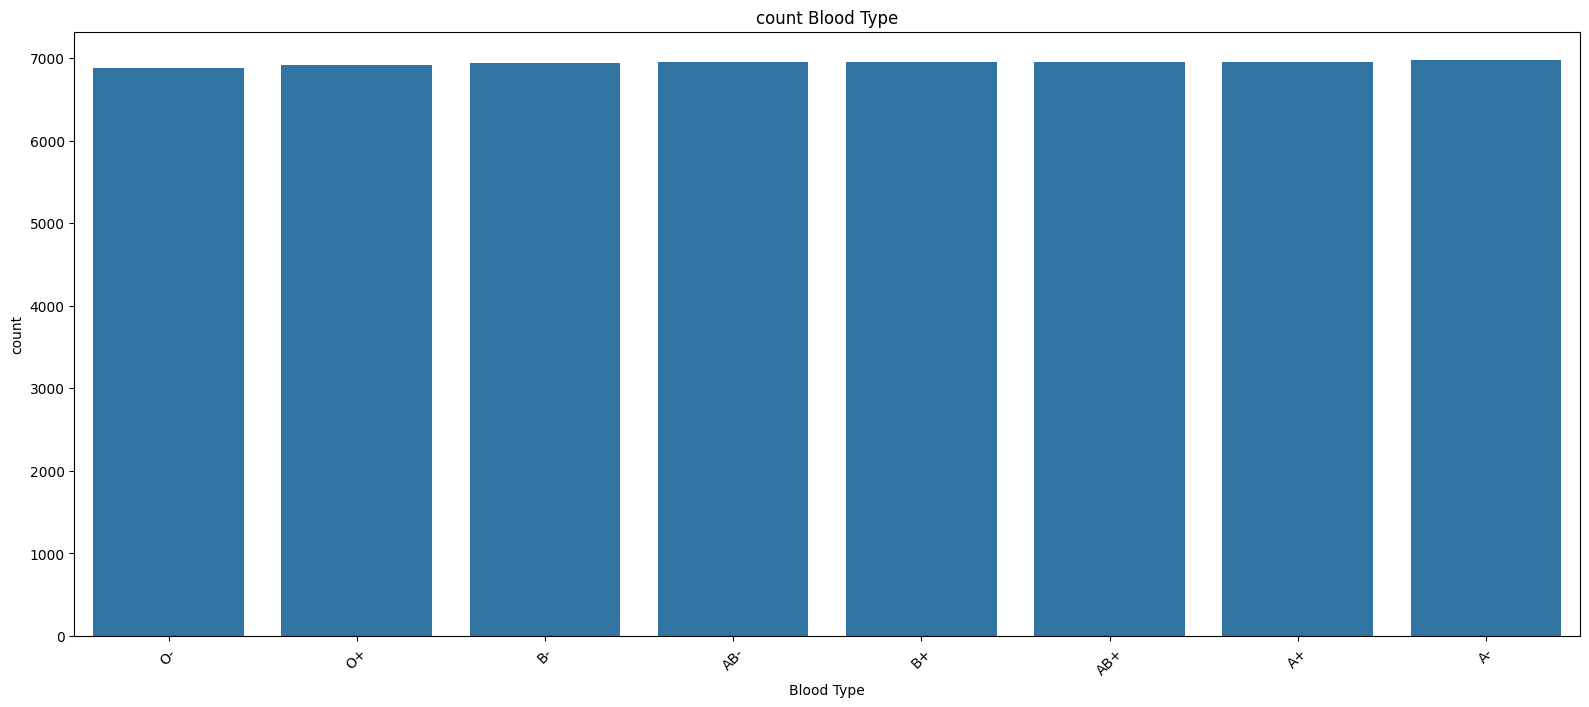

count Medical Condition : 
 Medical Condition
Asthma          9185
Cancer          9227
Obesity         9231
Hypertension    9245
Diabetes        9304
Arthritis       9308
Name: count, dtype: int64


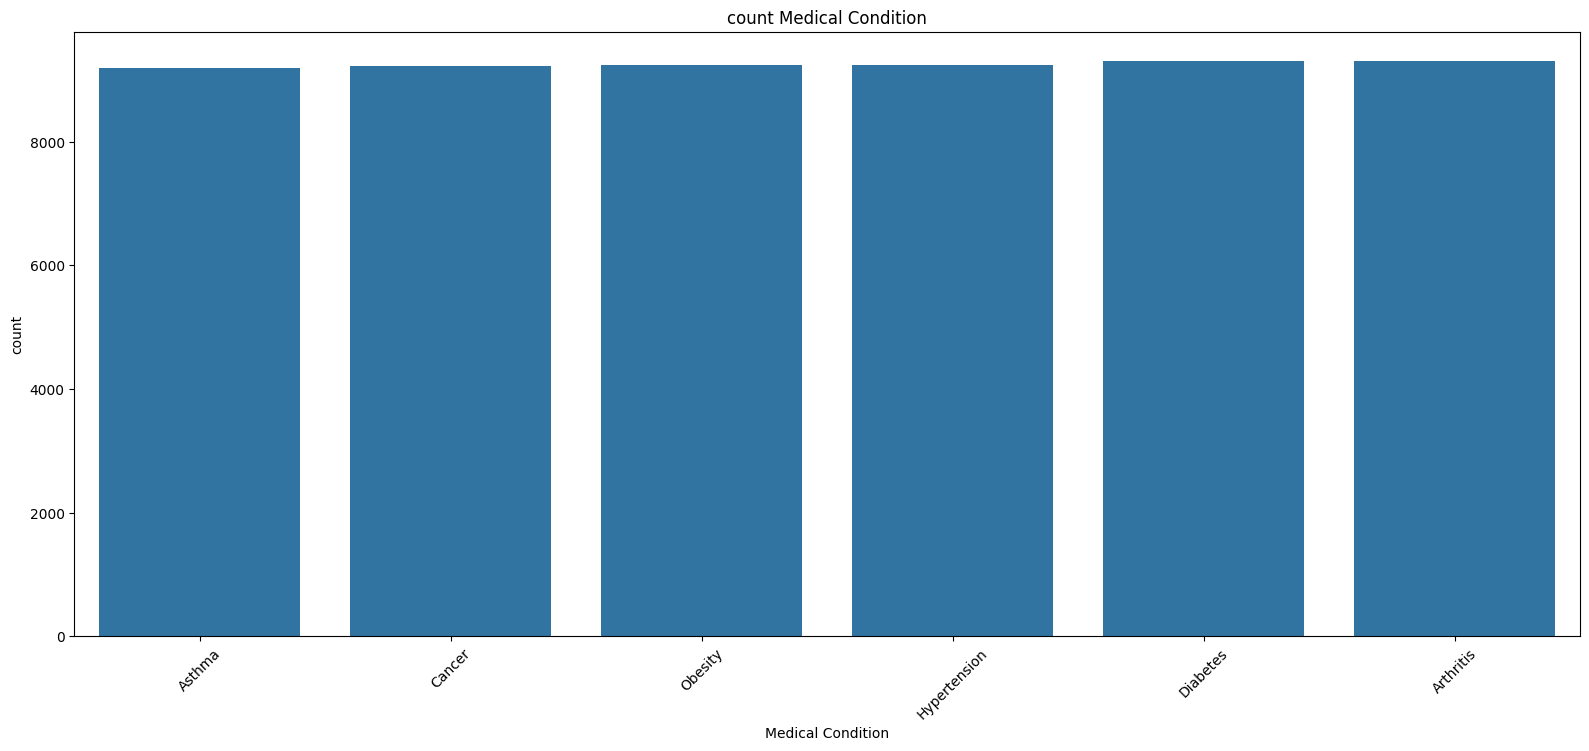

count Insurance Provider : 
 Insurance Provider
Aetna               10913
Blue Cross          11059
UnitedHealthcare    11125
Medicare            11154
Cigna               11249
Name: count, dtype: int64


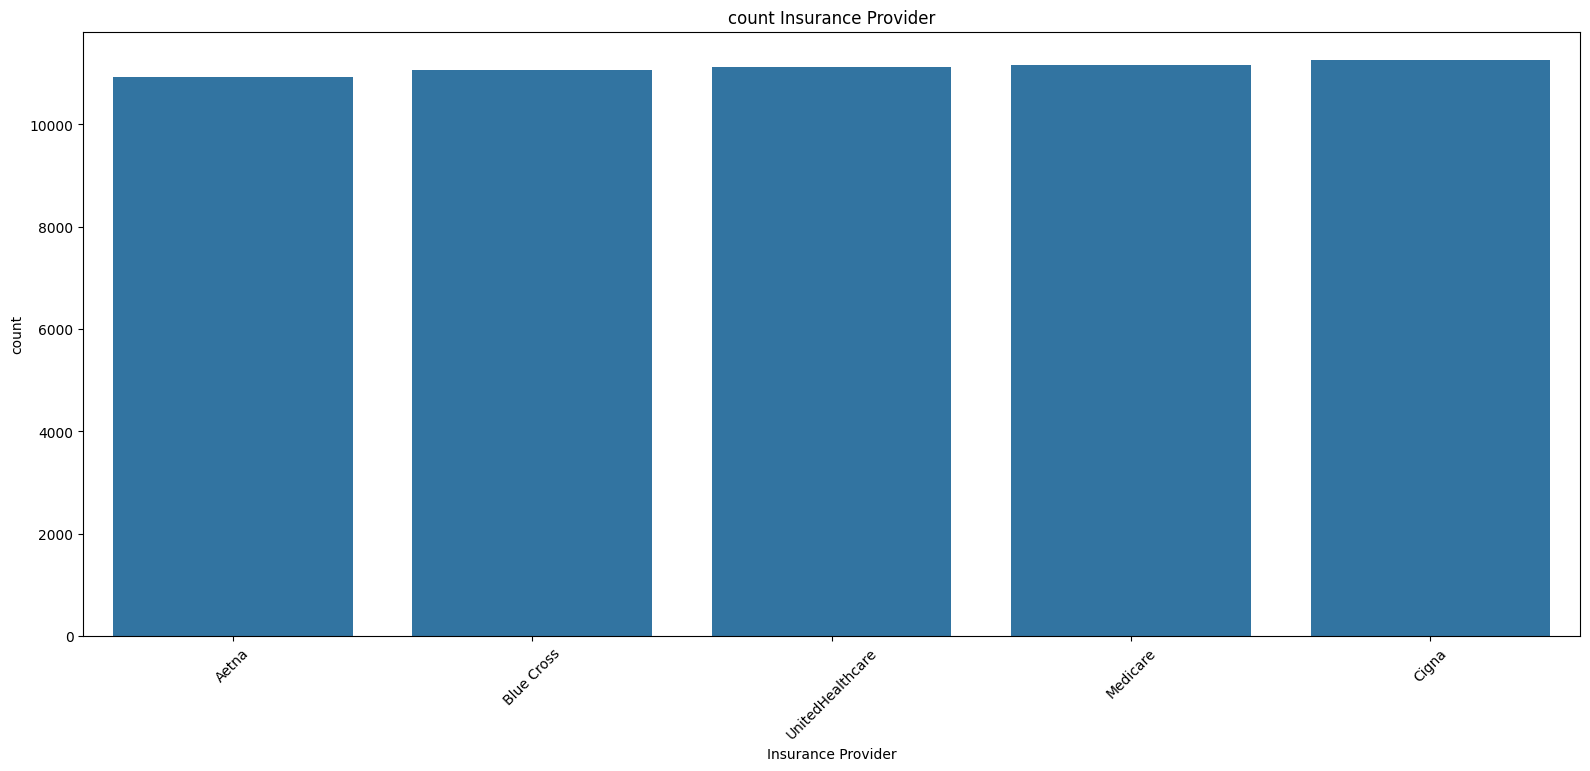

count Admission Type : 
 Admission Type
Emergency    18269
Urgent       18576
Elective     18655
Name: count, dtype: int64


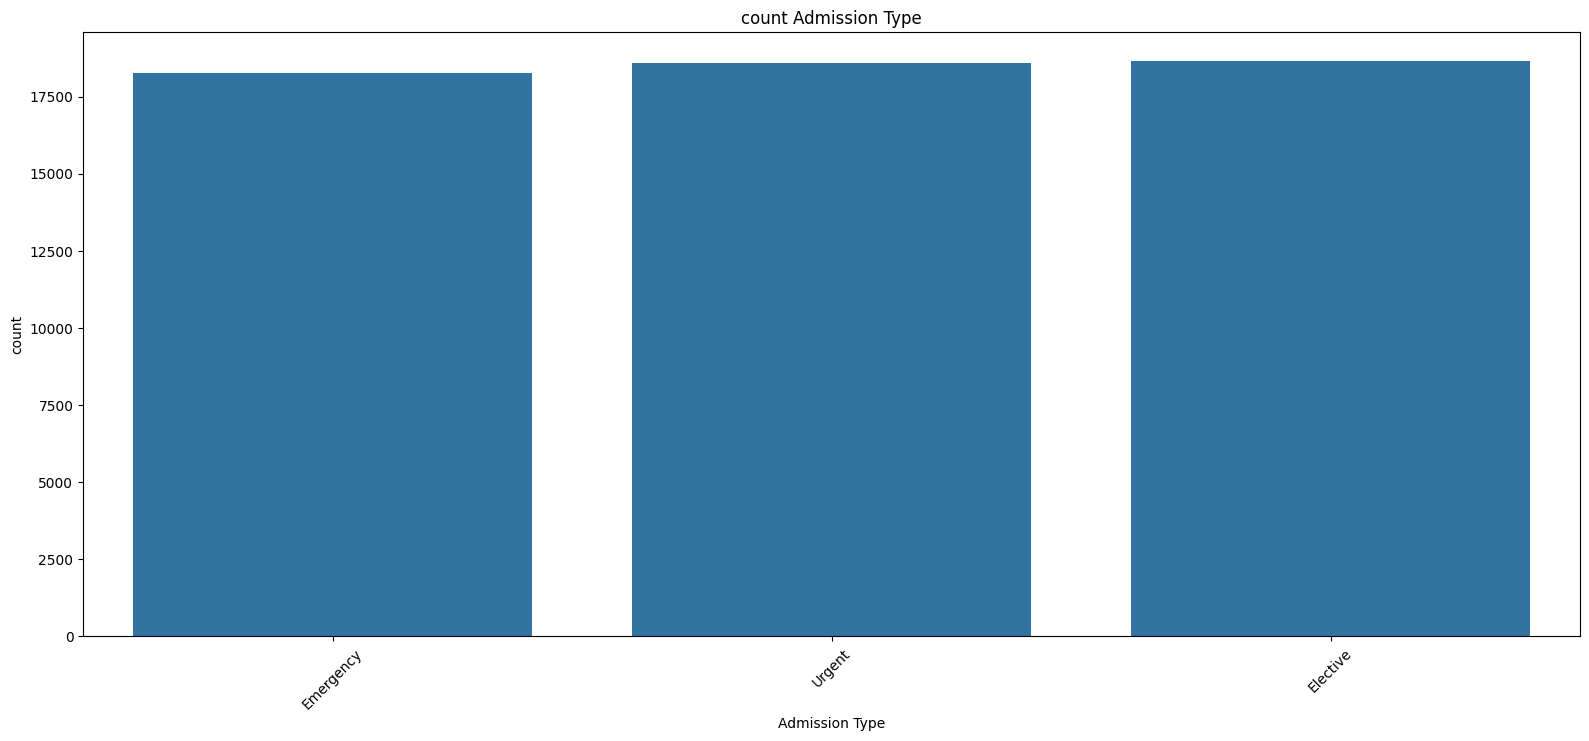

count Medication : 
 Medication
Penicillin     11068
Paracetamol    11071
Aspirin        11094
Ibuprofen      11127
Lipitor        11140
Name: count, dtype: int64


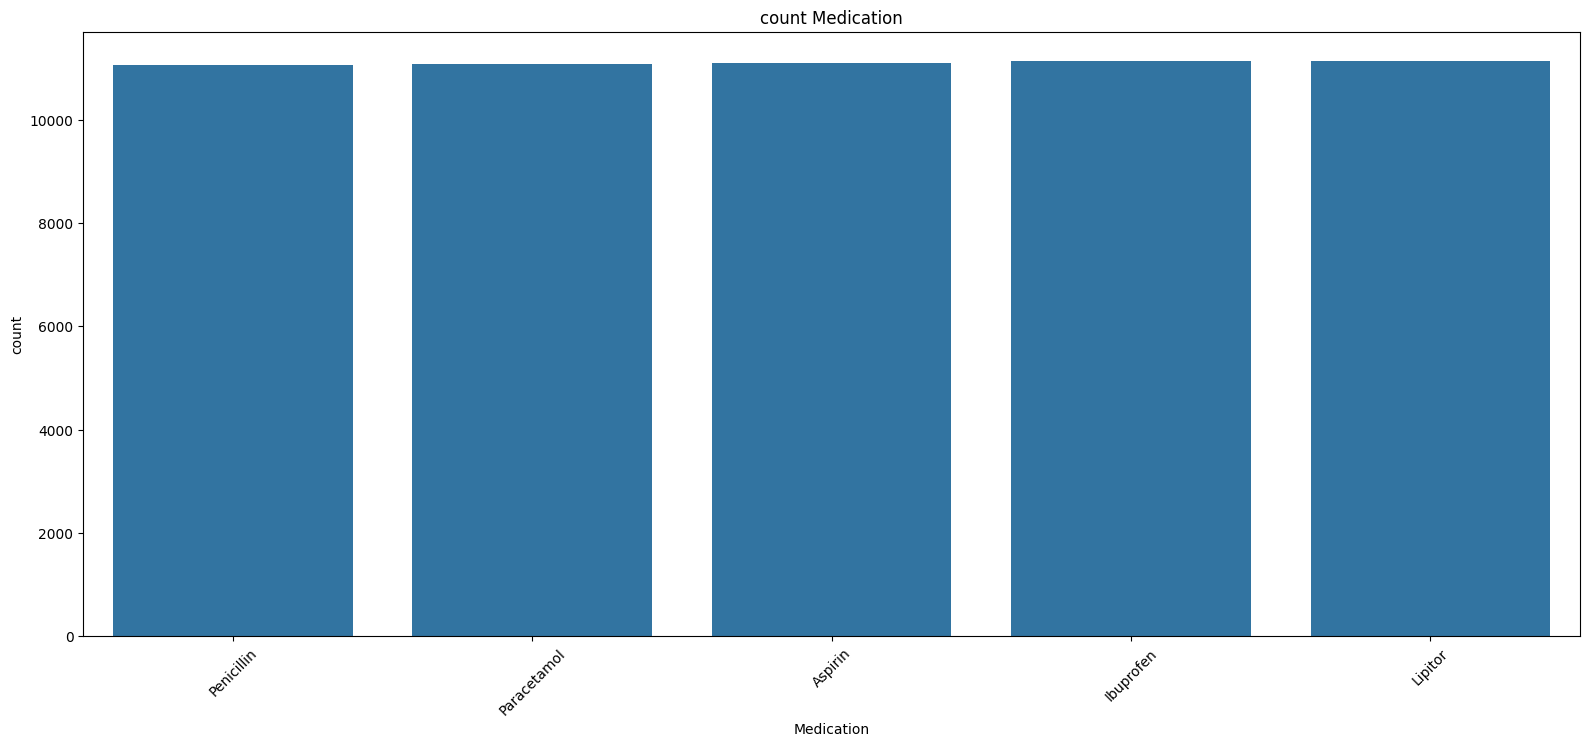

count Test Results : 
 Test Results
Inconclusive    18356
Normal          18517
Abnormal        18627
Name: count, dtype: int64


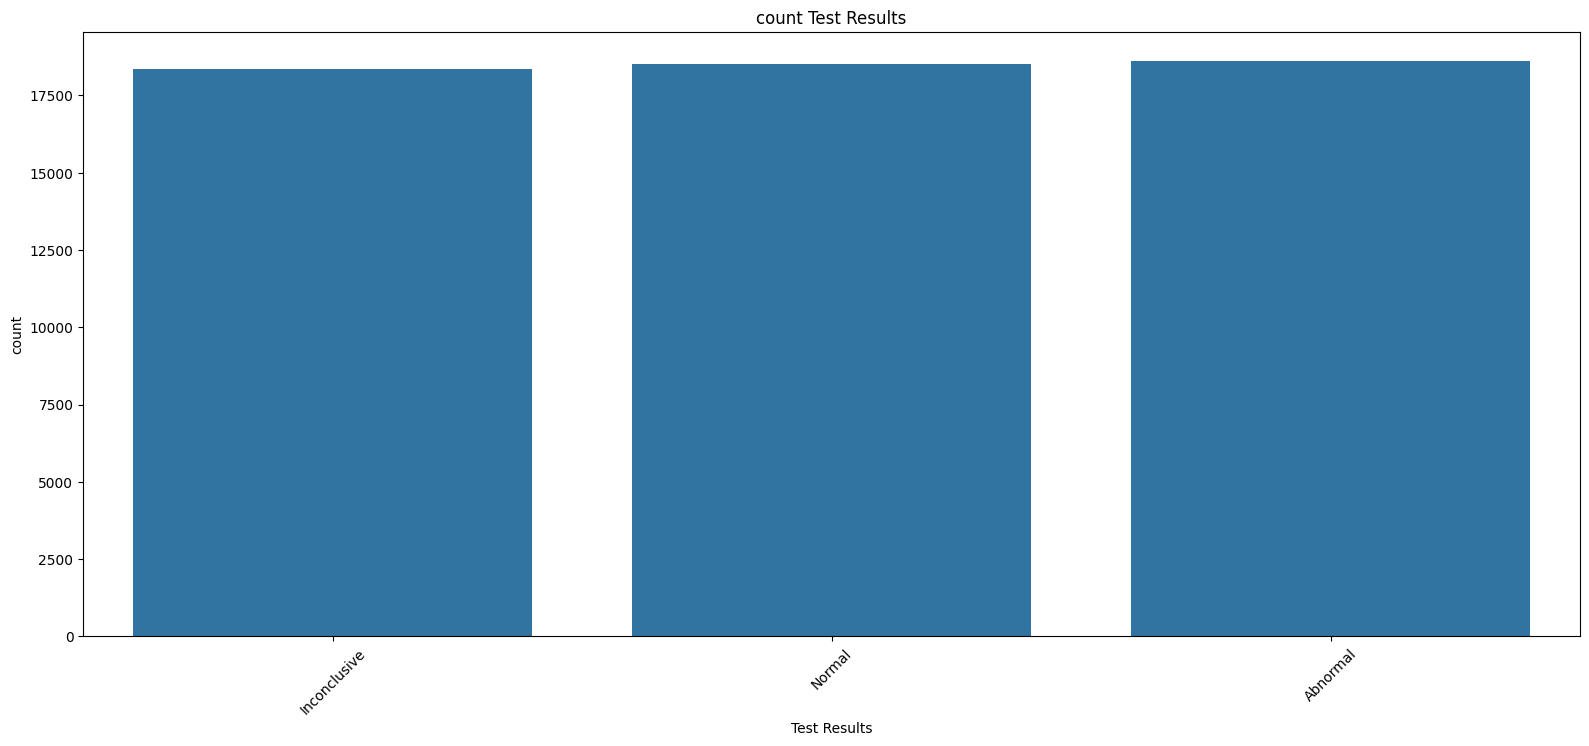

count day_Admission : 
 day_Admission
31    1026
30    1689
11    1696
29    1719
17    1729
18    1757
23    1768
14    1777
2     1778
19    1789
26    1790
4     1792
28    1798
15    1812
27    1816
22    1817
16    1821
10    1829
12    1831
6     1844
20    1848
25    1849
7     1856
9     1860
5     1860
13    1867
8     1876
21    1877
1     1885
24    1908
3     1936
Name: count, dtype: int64


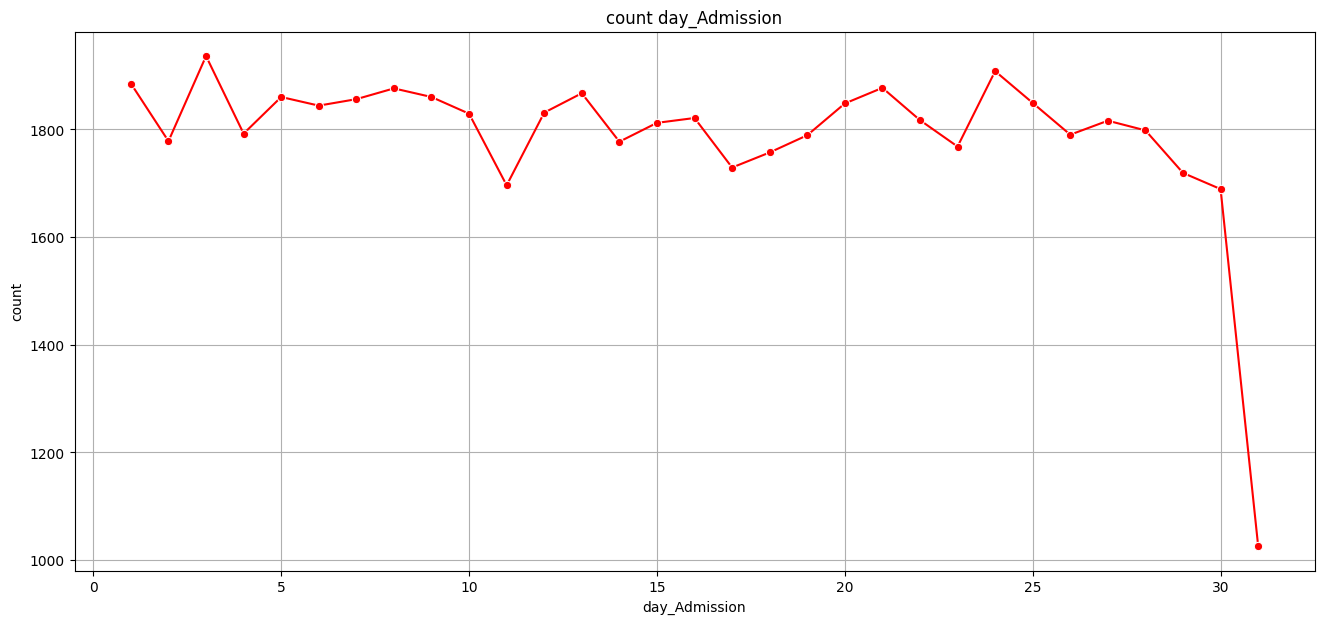

count month_Admission : 
 month_Admission
2     4255
4     4518
9     4546
11    4548
5     4599
12    4649
3     4672
10    4678
1     4692
6     4699
7     4812
8     4832
Name: count, dtype: int64


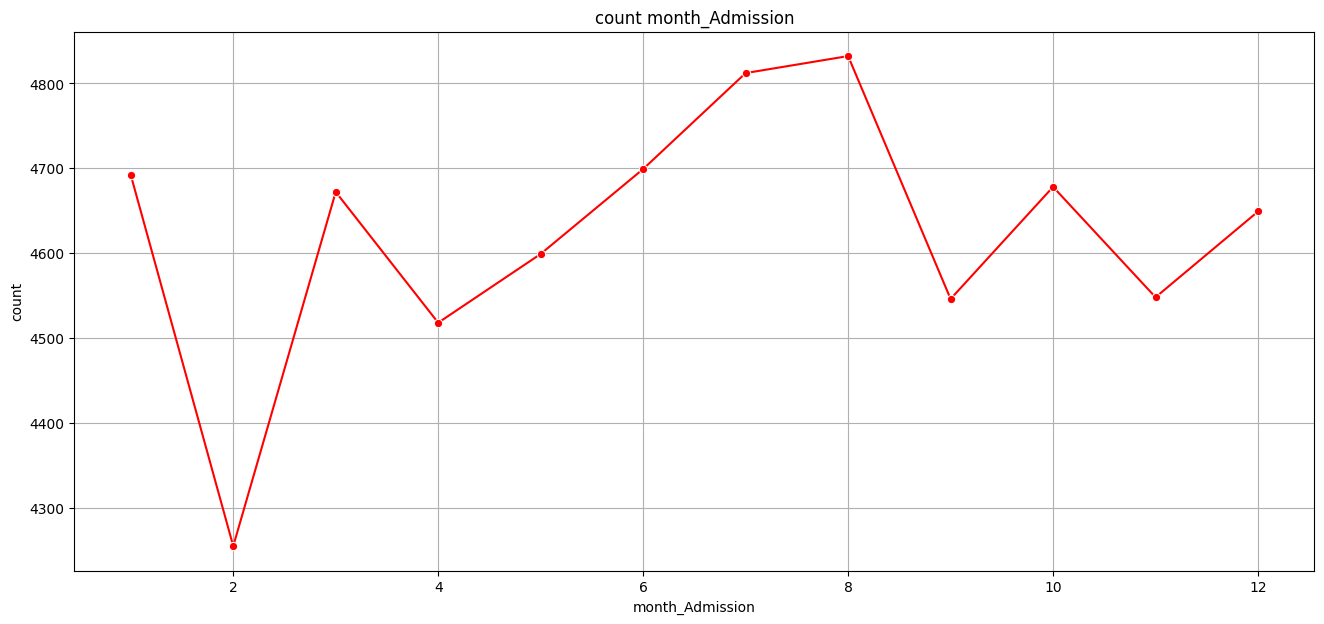

count year_Admission : 
 year_Admission
2024     3854
2019     7387
2021    10931
2022    11017
2023    11026
2020    11285
Name: count, dtype: int64


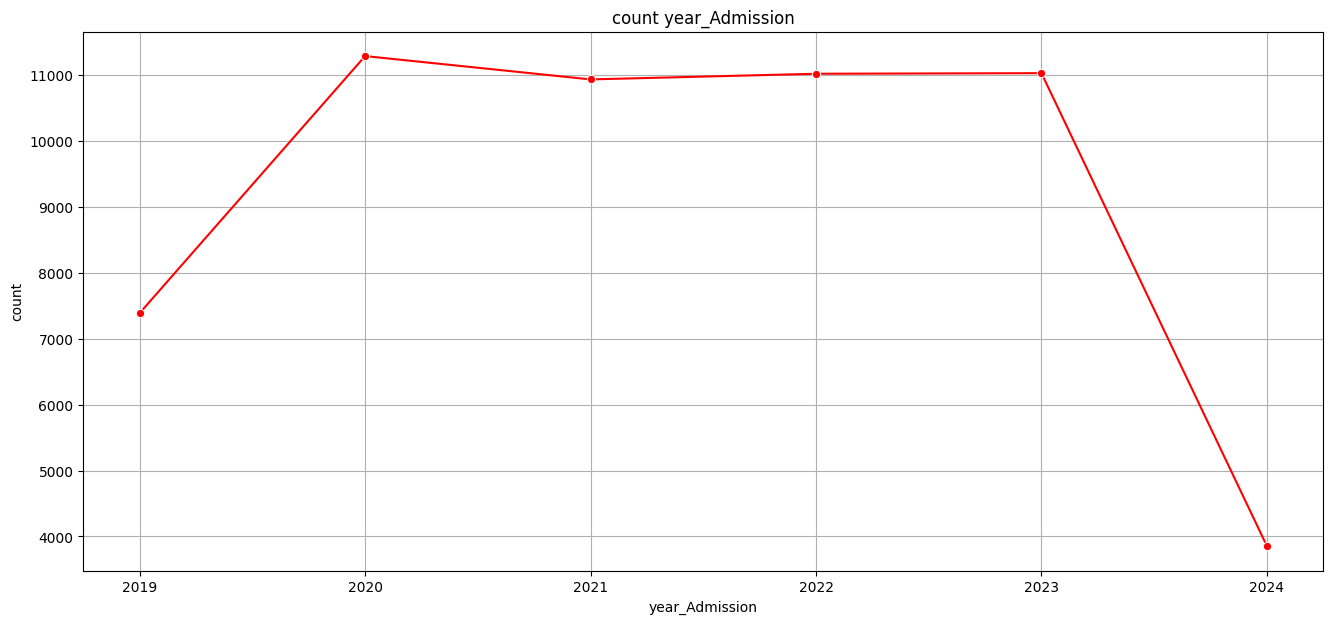

count week_Admission : 
 week_Admission
Monday       7866
Friday       7892
Saturday     7901
Sunday       7920
Wednesday    7950
Tuesday      7982
Thursday     7989
Name: count, dtype: int64


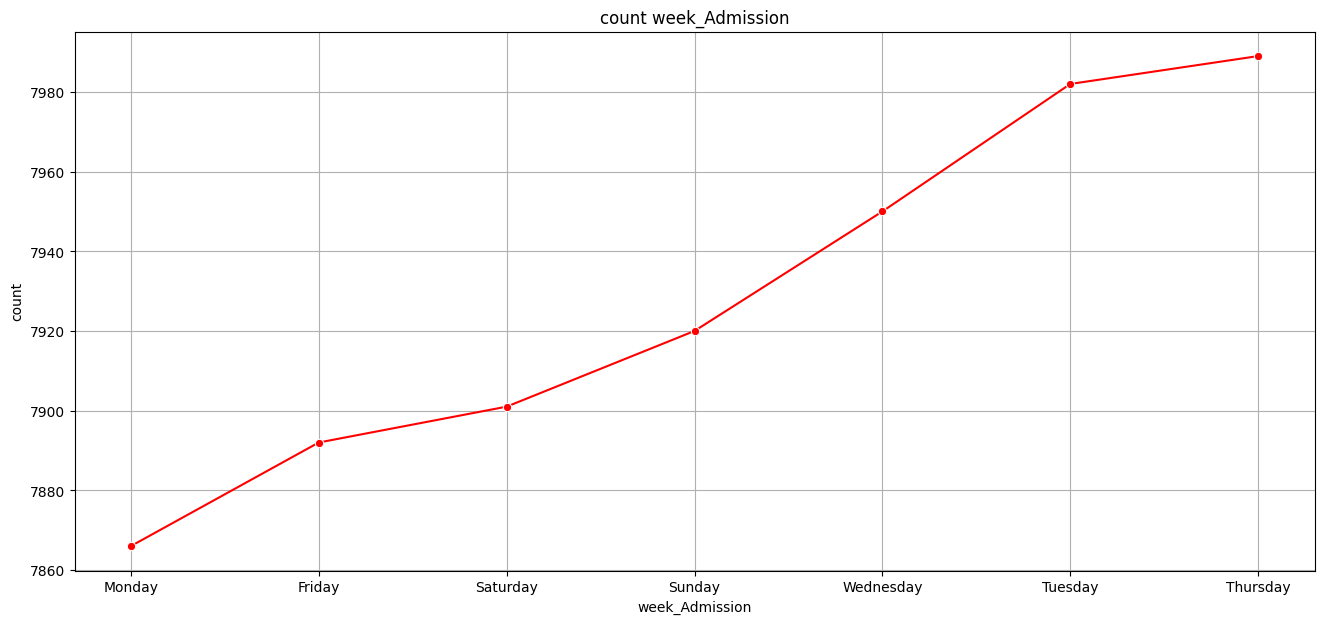

count day_Discharge : 
 day_Discharge
31    1025
2     1631
30    1635
29    1659
10    1750
8     1794
16    1794
6     1795
19    1808
9     1810
11    1811
1     1814
4     1815
17    1817
14    1820
23    1821
26    1834
25    1835
18    1842
13    1855
7     1858
21    1858
27    1860
20    1861
28    1865
3     1866
12    1867
5     1869
22    1870
15    1874
24    1887
Name: count, dtype: int64


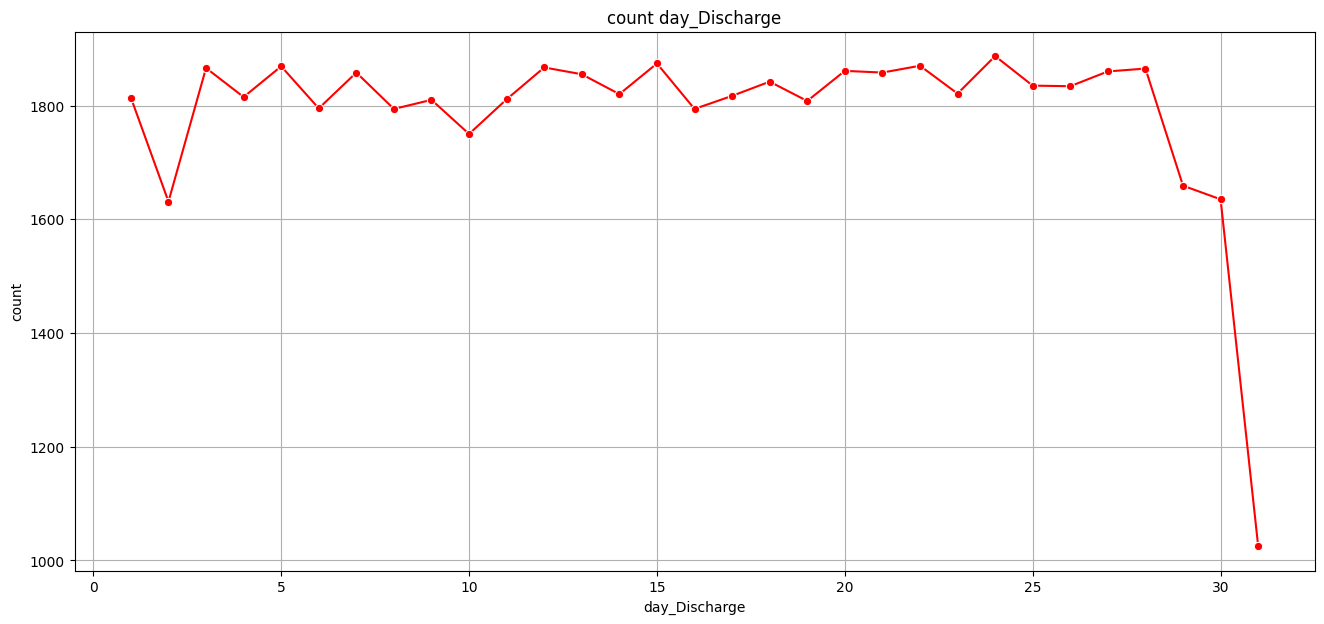

count month_Discharge : 
 month_Discharge
2     4319
4     4499
11    4523
6     4574
3     4625
12    4654
1     4665
10    4666
5     4696
9     4721
8     4765
7     4793
Name: count, dtype: int64


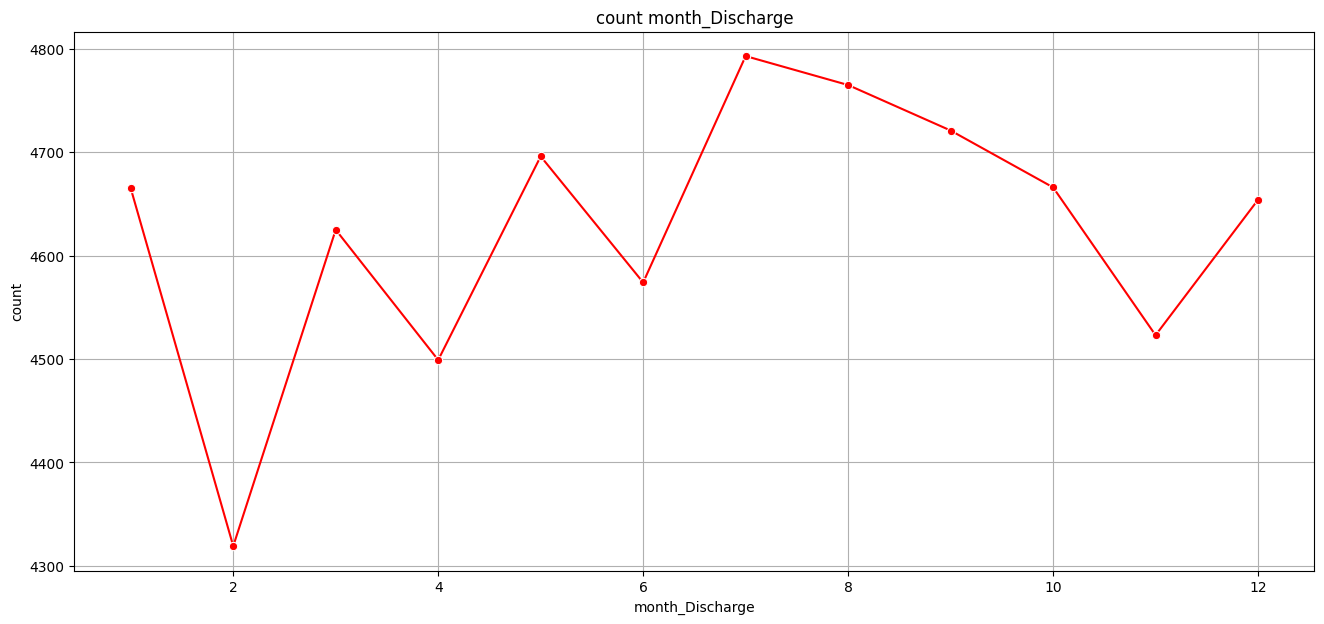

count year_Discharge : 
 year_Discharge
2024     4302
2019     6921
2021    10891
2022    11019
2023    11060
2020    11307
Name: count, dtype: int64


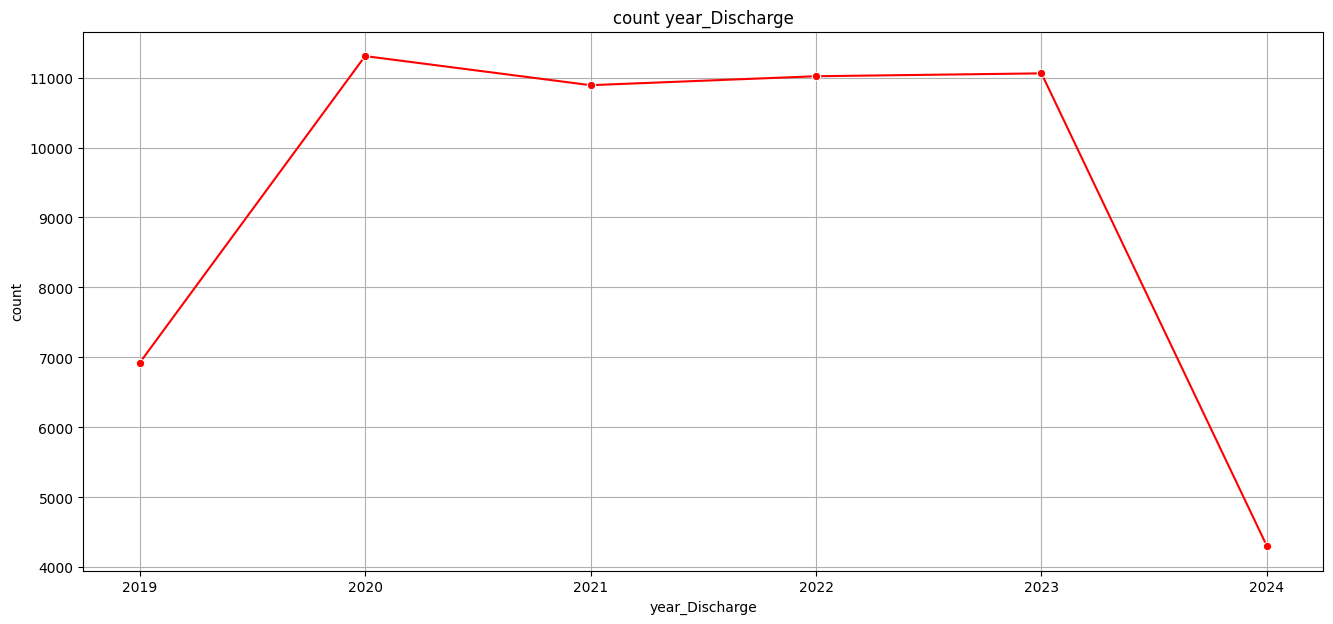

count week_Discharge : 
 week_Discharge
Tuesday      7779
Monday       7882
Saturday     7895
Sunday       7926
Wednesday    7970
Friday       8019
Thursday     8029
Name: count, dtype: int64


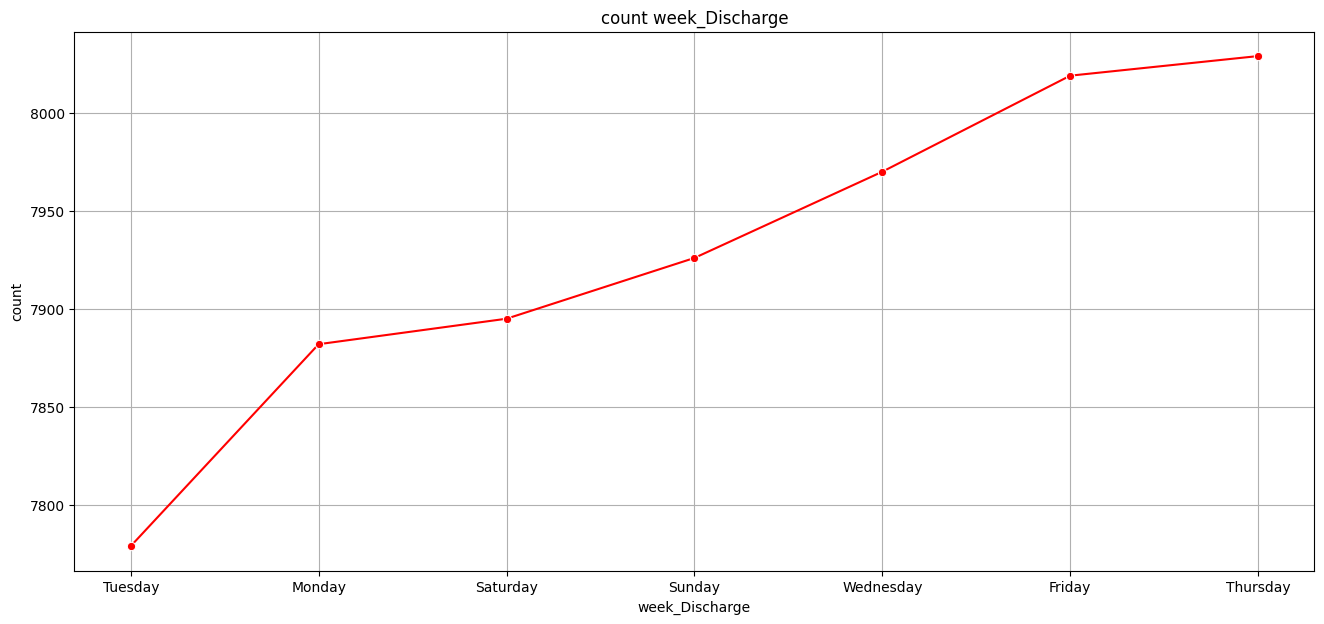

In [8]:
columns = ['Gender','Blood Type' , 'Medical Condition', 'Insurance Provider' , 'Admission Type' , 'Medication' , 'Test Results']
columns_date = ['day_Admission','month_Admission','year_Admission','week_Admission','day_Discharge','month_Discharge','year_Discharge','week_Discharge']
# a function to count the values
def get_value_counts(col):
    df = data[col].value_counts().sort_values()
    print(f'count {col} : \n {df}')
    return df
# a function to plot a bar chart
def plot_bar_chart(labels , counts , col):
    plt.figure(figsize=(16 , 7))
    sns.barplot(x = labels , y = counts)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title(f'count {col}')
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.show()
for col in columns:
    df = get_value_counts(col)
    plot_bar_chart(df.index , df.values , col)
# Function to plot a line chart
def line_plot_dubel(labels , values , col):
    plt.figure(figsize=(16 , 7))
    sns.lineplot(x = labels , y = values , marker= 'o',color = 'red')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title(f'count {col}')
    plt.grid()
    plt.show()
for col in columns_date:
    df2 = get_value_counts(col)
    line_plot_dubel(df2.index , df2.values , col)

- Blood types among patients are relatively evenly distributed. The most common blood type is A- with 6,969 cases, followed closely by A+ with 6,956 cases. The least common is O- with 6,877 cases. This indicates that there is no significant disparity in the distribution of blood types.
- The medical conditions among patients are fairly evenly distributed. Arthritis is the most common condition with 9,308 cases, followed closely by Diabetes with 9,304 cases. The least common condition is Asthma, with 9,185 cases. This suggests that the dataset includes a balanced representation of the most common chronic illnesses.
- Patients are fairly evenly distributed across different health insurance providers. The most commonly used provider is Cigna with 11,249 patients, followed by Medicare with 11,154 patients, while the least used provider is Aetna with 10,913 patients. This indicates a diverse utilization of insurance services among patients without a dominant provider.
- Hospital admissions are distributed among three main categories. The most common admission type is Elective with 18,655 cases, followed by Urgent with 18,576 cases, and Emergency with 18,269 cases. This suggests that the majority of admissions were non-emergency, which may reflect the nature of the healthcare system or patient case patterns.
- The data shows a relatively balanced distribution of medication usage among patients. Lipitor is the most commonly used medication with 11,140 patients, followed by Ibuprofen with 11,127 patients, while Penicillin is the least used with 11,068 patients. This indicates a diverse use of medications with no significant disparity in usage rates.
- Test results are distributed across three main categories. The most frequent result is "Abnormal" with 18,627 patients, followed by "Normal" with 18,517 patients, and "Inconclusive" with 18,356 patients. This indicates that a significant portion of patients had test results suggesting potential health issues.
- The distribution of hospital admissions by day of the month shows slight variation. Day 3 had the highest number of admissions with 1,936 cases, followed by Day 24 with 1,908 cases. The lowest number was recorded on Day 31, with 1,026 cases, which is expected as not all months have 31 days.Overall, the distribution appears fairly balanced, suggesting a relatively steady admission rate throughout the month, with minor peaks during mid to late-month periods.
-The distribution of hospital admissions by month shows slight seasonal variation throughout the year.August (8) recorded the highest number of admissions with 4,832 cases, followed closely by July (7) with 4,812 cases, suggesting increased hospital activity during the summer months.On the other hand, February (2) had the lowest number of admissions at 4,255, which is expected due to its shorter length.Overall, the pattern suggests mild seasonality, with slightly higher admissions mid-year and relatively lower at the beginning.
- The year 2020 recorded the highest number of admissions with 11,285 cases, aligning with the peak of the COVID-19 pandemic and its strain on healthcare systems.
It was followed closely by 2023 and 2022, with 11,026 and 11,017 admissions respectively, indicating a continued high demand for hospital services post-pandemic.2024 had the lowest number of admissions, with 3,854 cases.Notably, 2019 had a relatively lower count (7,387), reflecting pre-pandemic conditions.
- Thursday recorded the highest number of admissions with 7,989 cases, followed closely by Tuesday with 7,982 cases, while Monday had the lowest with 7,866 cases.This close distribution suggests that patient admissions remain steady throughout the week, indicating consistent hospital operations.
- Day 24 recorded the highest number of discharges with 1,887 cases, followed by Day 15 with 1,874 cases, while Day 31 had the lowest with 1,025 cases, which is expected since not all months include this day.
- July (7) had the highest number of discharges at 4,793 cases, followed by August (8) with 4,765 cases, while February (2) had the lowest with 4,319 cases.
- The highest number of discharges occurred in 2020, with 11,307 cases, followed by 2023 and 2022 with 11,060 and 11,019 cases, respectively.
On the other hand, 2019 had the lowest count among the full years, with 6,921 cases, reflecting lower hospital demand before the pandemic.2024 recorded the lowest number overall with 4,302 discharges
- Thursday recorded the highest number of discharges with 8,029 cases, followed by Friday with 8,019 cases, while Tuesday had the lowest at 7,779 cases.

med Gender : 
         median        std
Gender                   
Female    52.0  19.670281
Male      52.0  19.534784


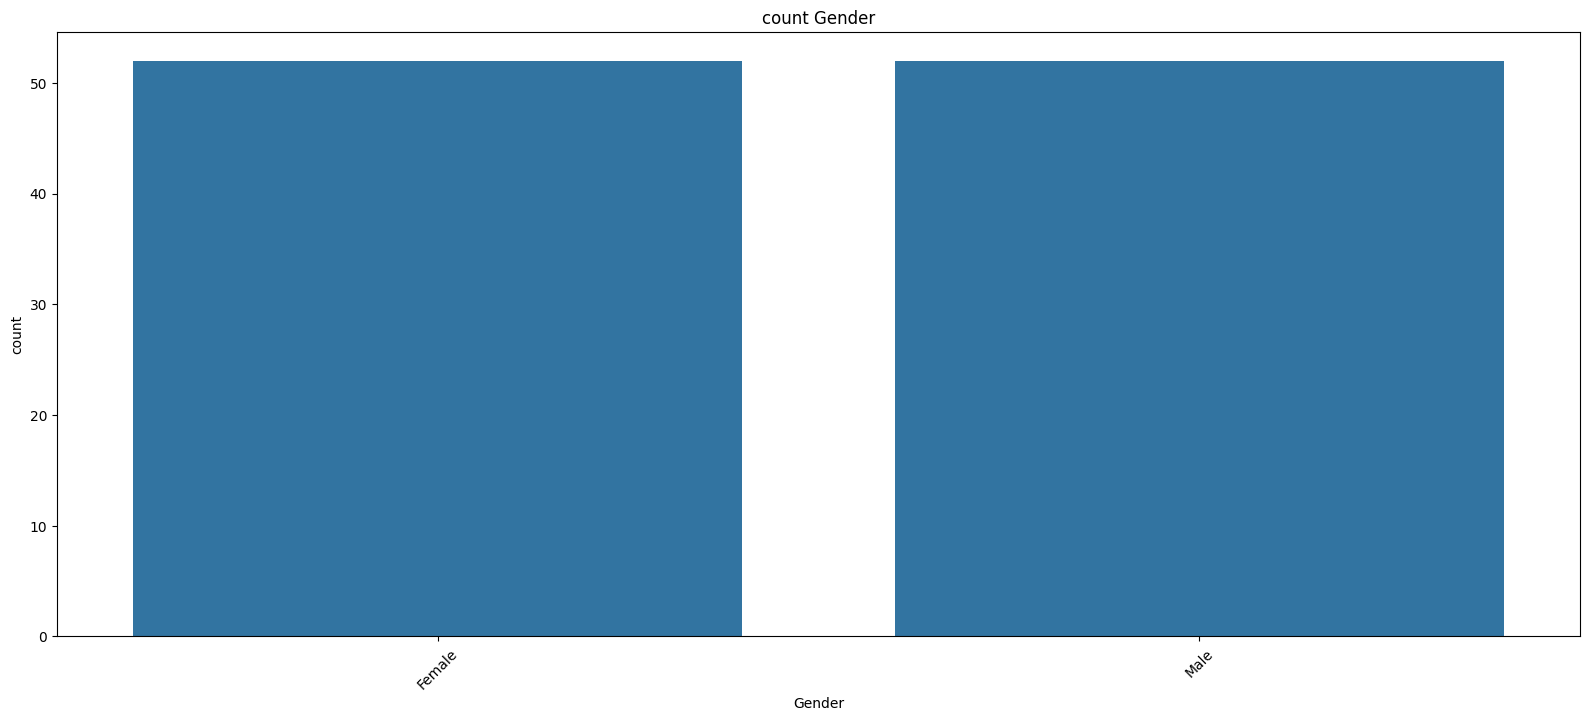

med Blood Type : 
             median        std
Blood Type                   
O+            51.0  19.471853
B-            51.0  19.689174
A+            52.0  19.769948
A-            52.0  19.538596
AB-           52.0  19.644934
AB+           52.0  19.499469
B+            52.0  19.519859
O-            52.0  19.689148


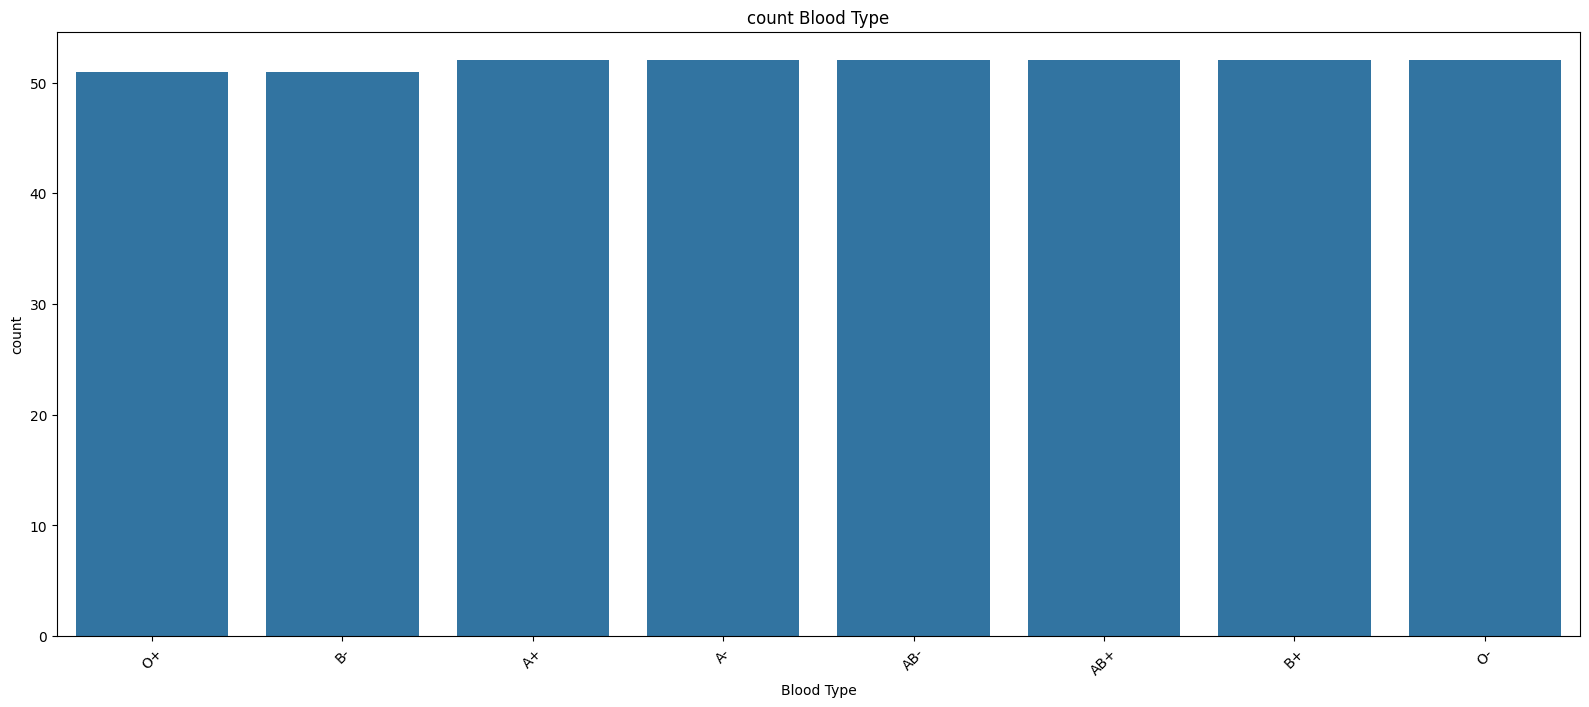

med Medical Condition : 
                    median        std
Medical Condition                   
Obesity              51.0  19.548626
Arthritis            52.0  19.623247
Cancer               52.0  19.659261
Asthma               52.0  19.711711
Diabetes             52.0  19.425088
Hypertension         52.0  19.649097


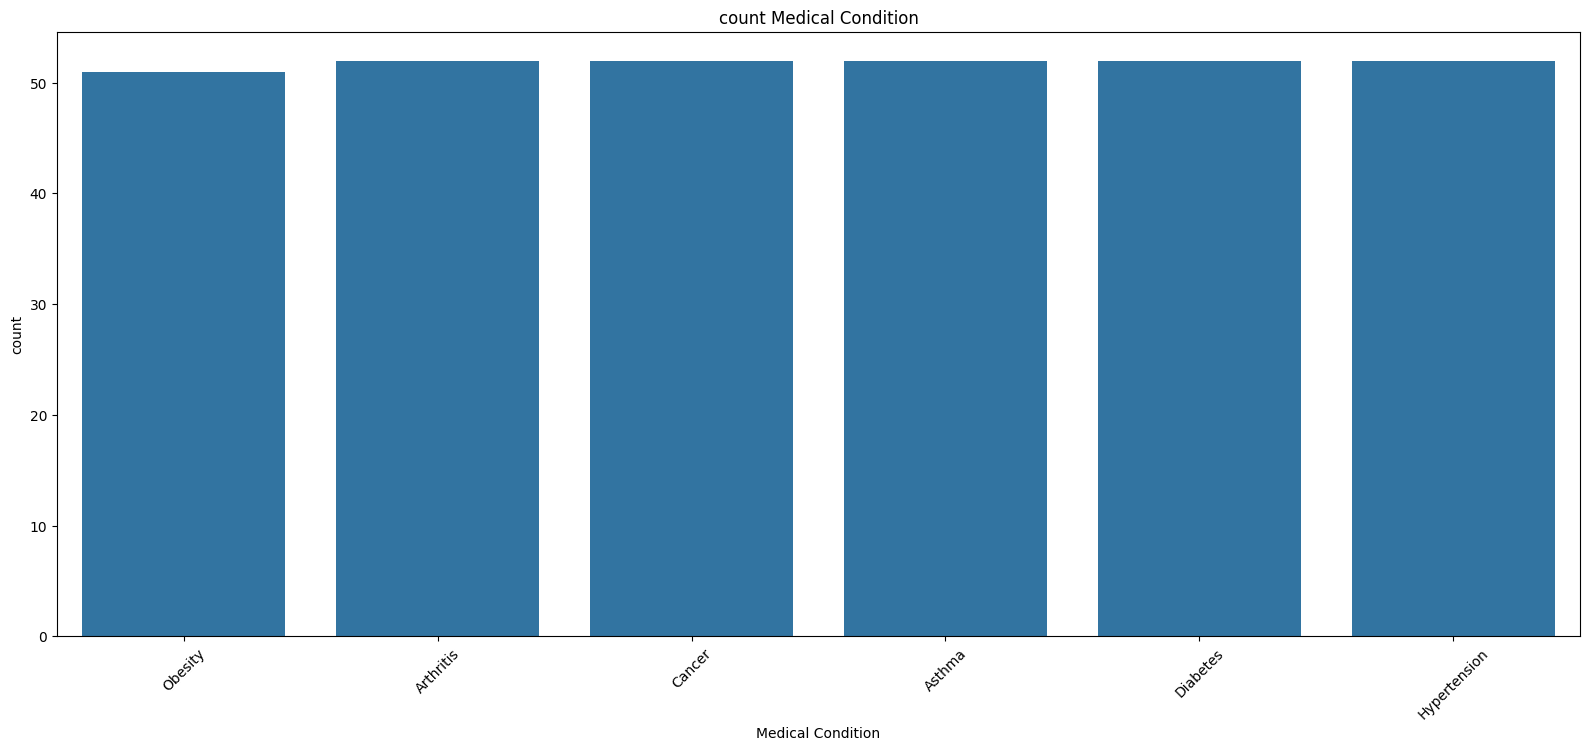

med Insurance Provider : 
                     median        std
Insurance Provider                   
Cigna                 51.0  19.708414
Aetna                 52.0  19.574435
Blue Cross            52.0  19.653406
Medicare              52.0  19.461241
UnitedHealthcare      52.0  19.614463


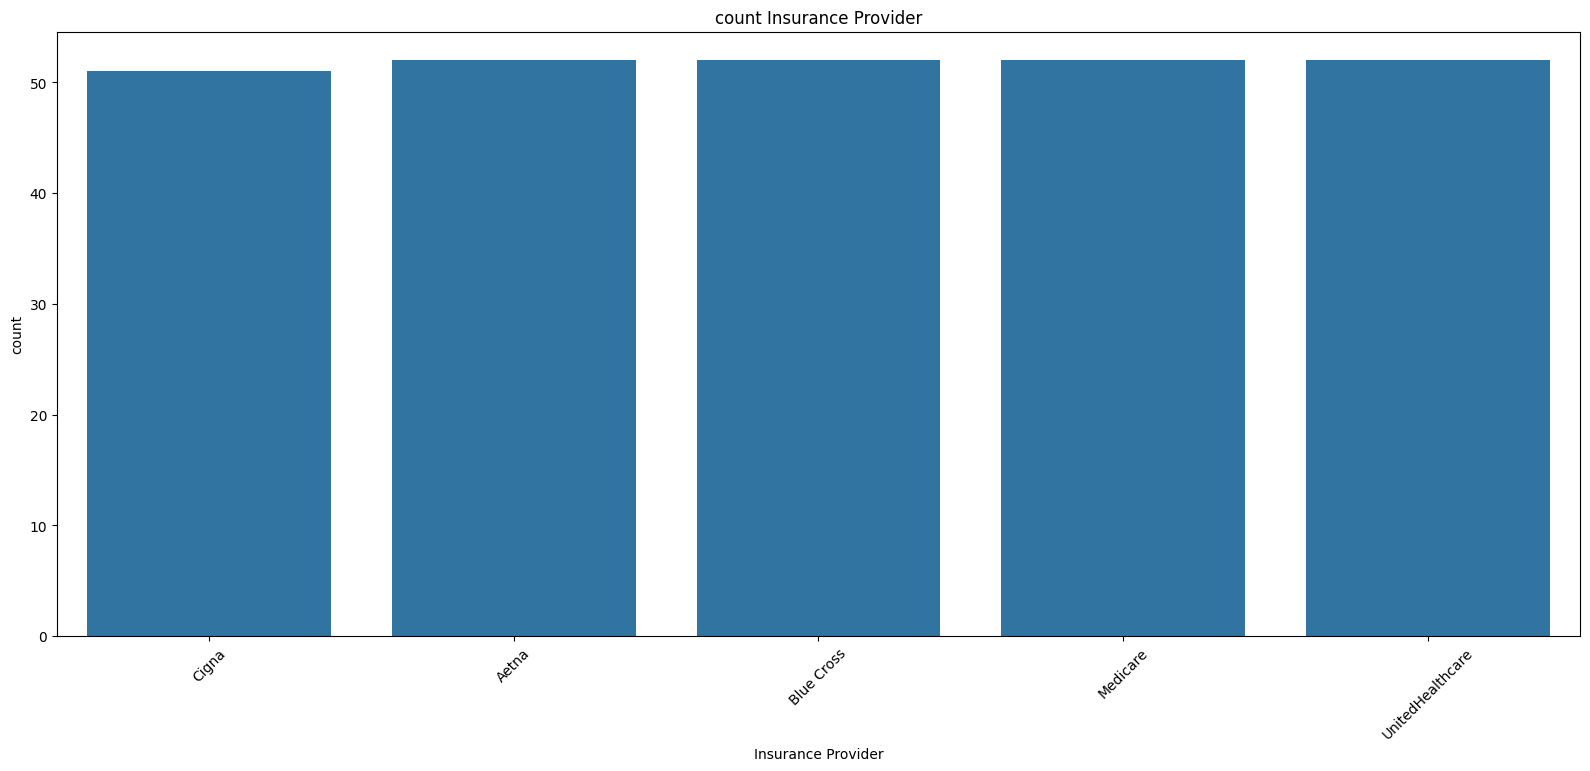

med Admission Type : 
                 median        std
Admission Type                   
Elective          52.0  19.421385
Emergency         52.0  19.724688
Urgent            52.0  19.663150


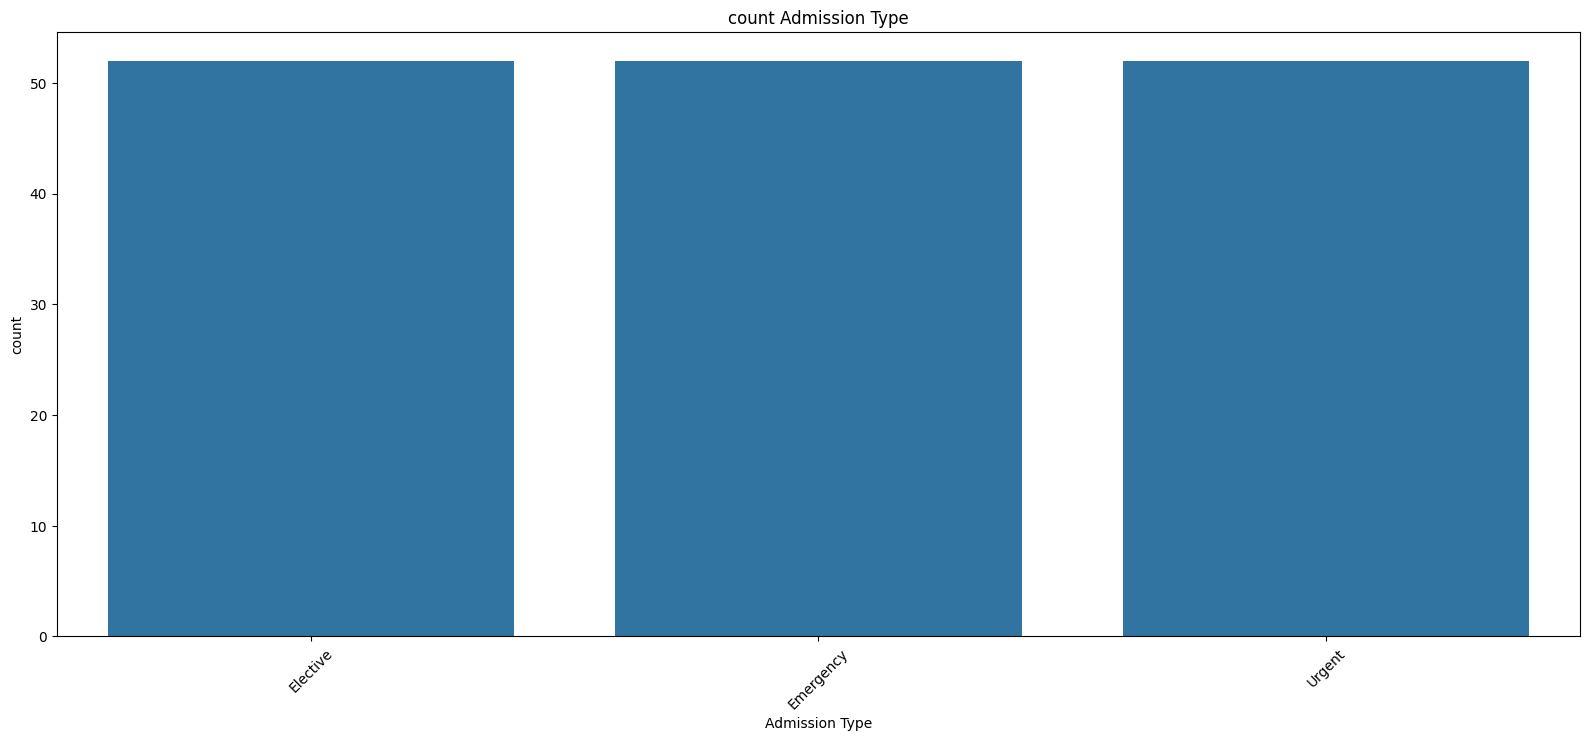

med Medication : 
              median        std
Medication                    
Lipitor        51.0  19.542750
Penicillin     51.0  19.662405
Ibuprofen      52.0  19.714362
Aspirin        52.0  19.618318
Paracetamol    52.0  19.472276


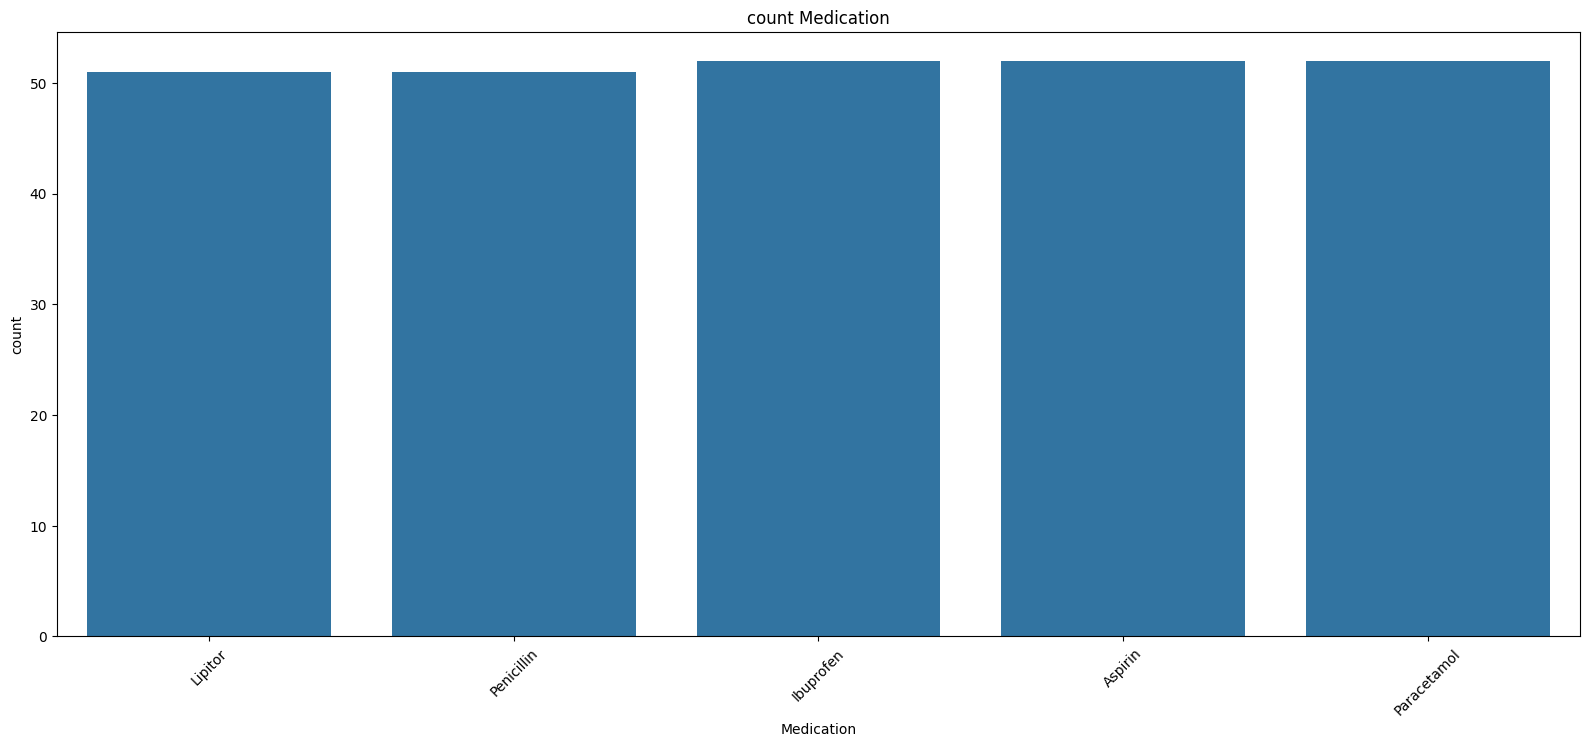

med Test Results : 
               median        std
Test Results                   
Normal          51.0  19.707791
Abnormal        52.0  19.560592
Inconclusive    52.0  19.537326


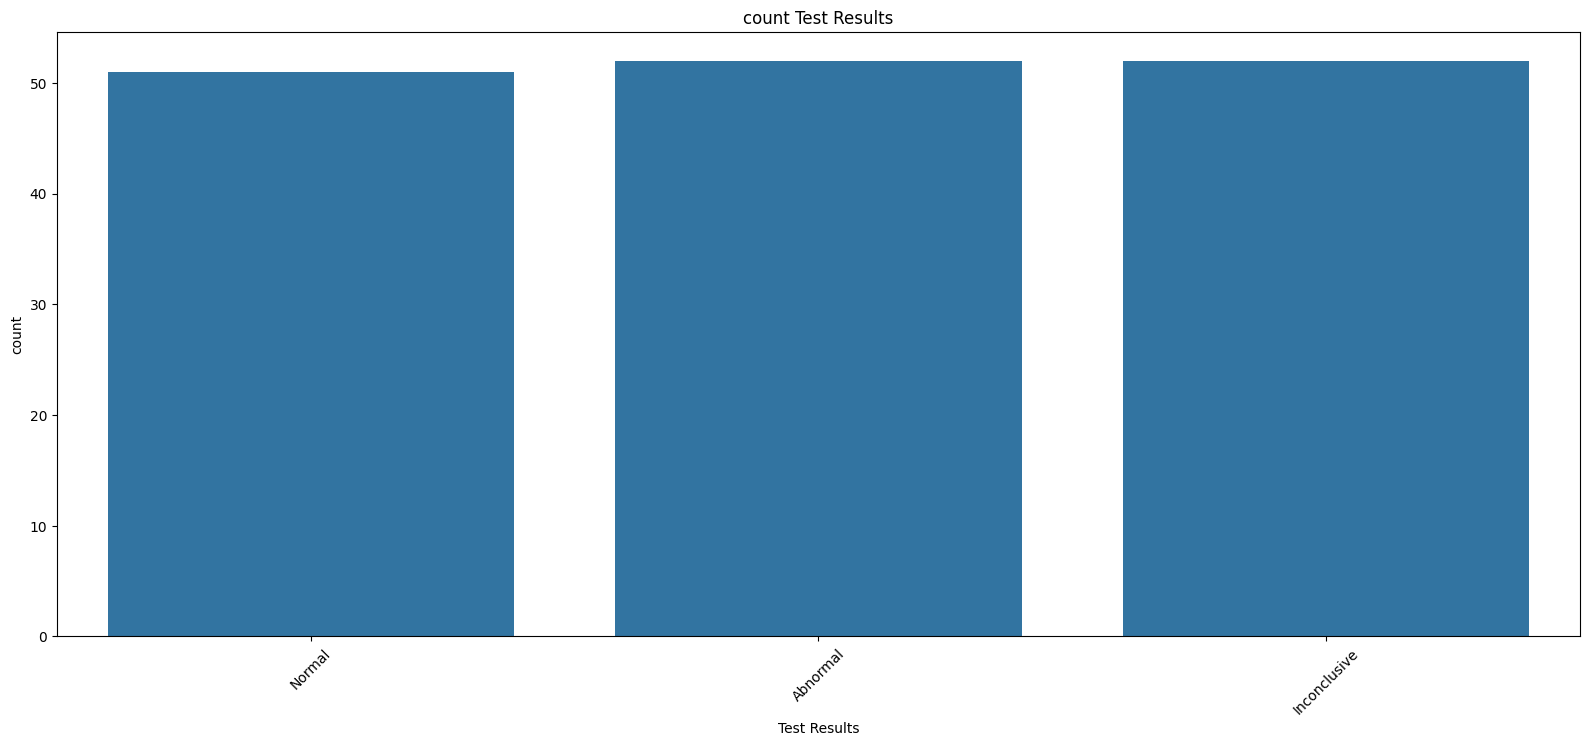

In [9]:
# a function to find the median age per category
def med_col(col):
    df = data.groupby(col)['Age'].agg(['median' , 'std']).sort_values(by='median')
    print(f'med {col} : \n {df}')
    return df
for col in columns: 
    df2 = med_col(col)
    plot_bar_chart(df2.index , df2['median'] , col)

- These findings suggest that there is no significant difference in age distribution between males and females. The similarity in both median and standard deviation values indicates a relatively homogeneous age profile across genders.
- The analysis suggests a relatively homogeneous age distribution among different medical conditions. No significant age-related differences were observed, which implies that age is not a major distinguishing factor across these patient groups in this dataset.
- These findings suggest a uniform age distribution among patients regardless of their insurance provider. The slight differences in median and standard deviation indicate that insurance type is not a significant factor in age variation within this dataset.
- The data reflects a uniform central age trend across all admission types, with only minor differences in variability. While emergency cases show slightly more age diversity, the overall age profiles remain relatively consistent.
- The findings show a generally homogeneous age distribution among patients using different medications. The minor differences in median and variability suggest that medication type is not strongly associated with age in this dataset
- The findings suggest that test result categories do not show significant differences in age distribution. Age does not appear to be a major differentiator across test outcomes in this dataset.

mean Gender : 
                 mean           std
Gender                            
Female  25470.652958  14204.002670
Male    25607.860571  14218.814406


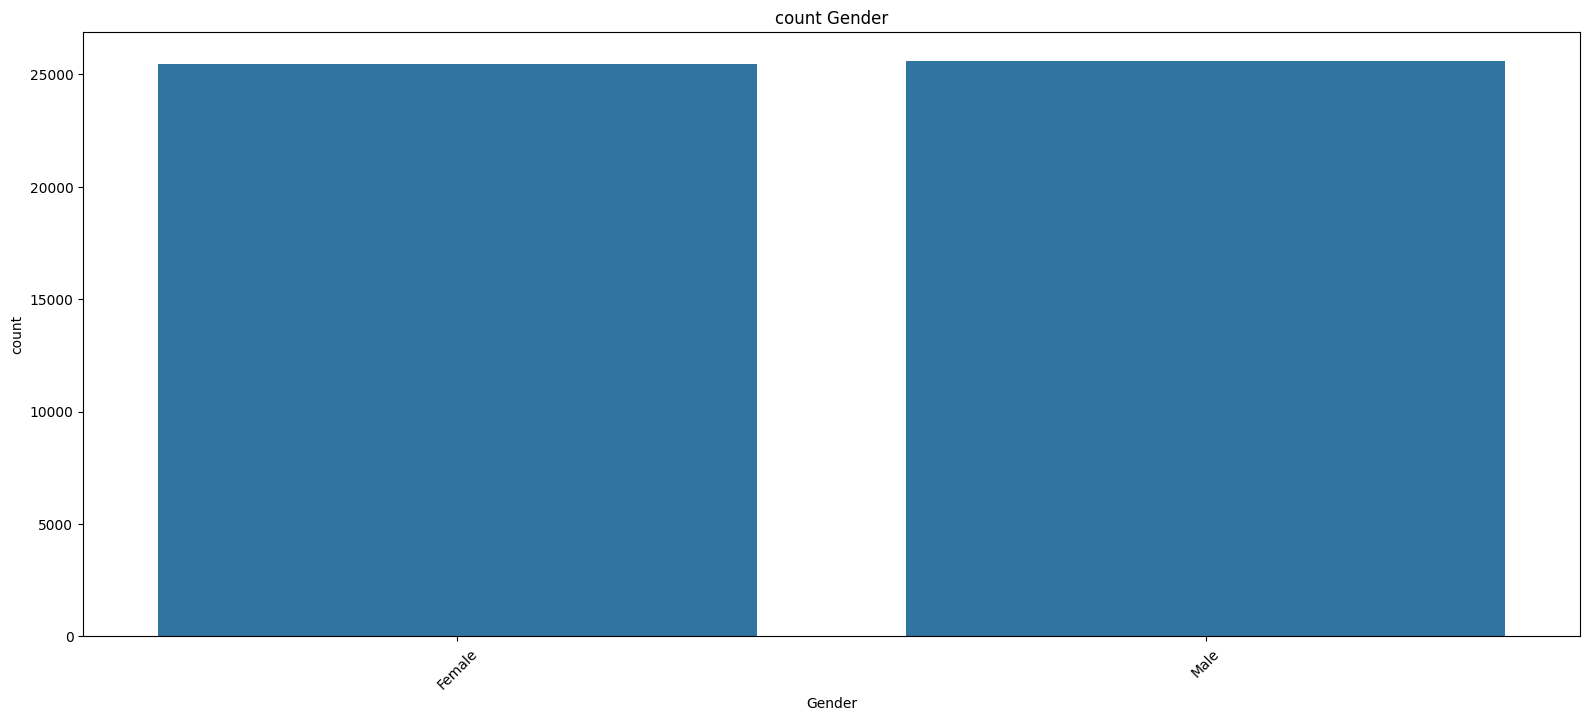

mean Blood Type : 
                     mean           std
Blood Type                            
O+          25249.740696  14408.895591
AB+         25361.458784  14222.821581
B+          25429.723237  14060.795915
B-          25524.424636  14171.159112
A-          25595.024701  14143.021364
A+          25664.566404  14246.351007
AB-         25694.933091  14192.734335
O-          25795.657833  14243.532507


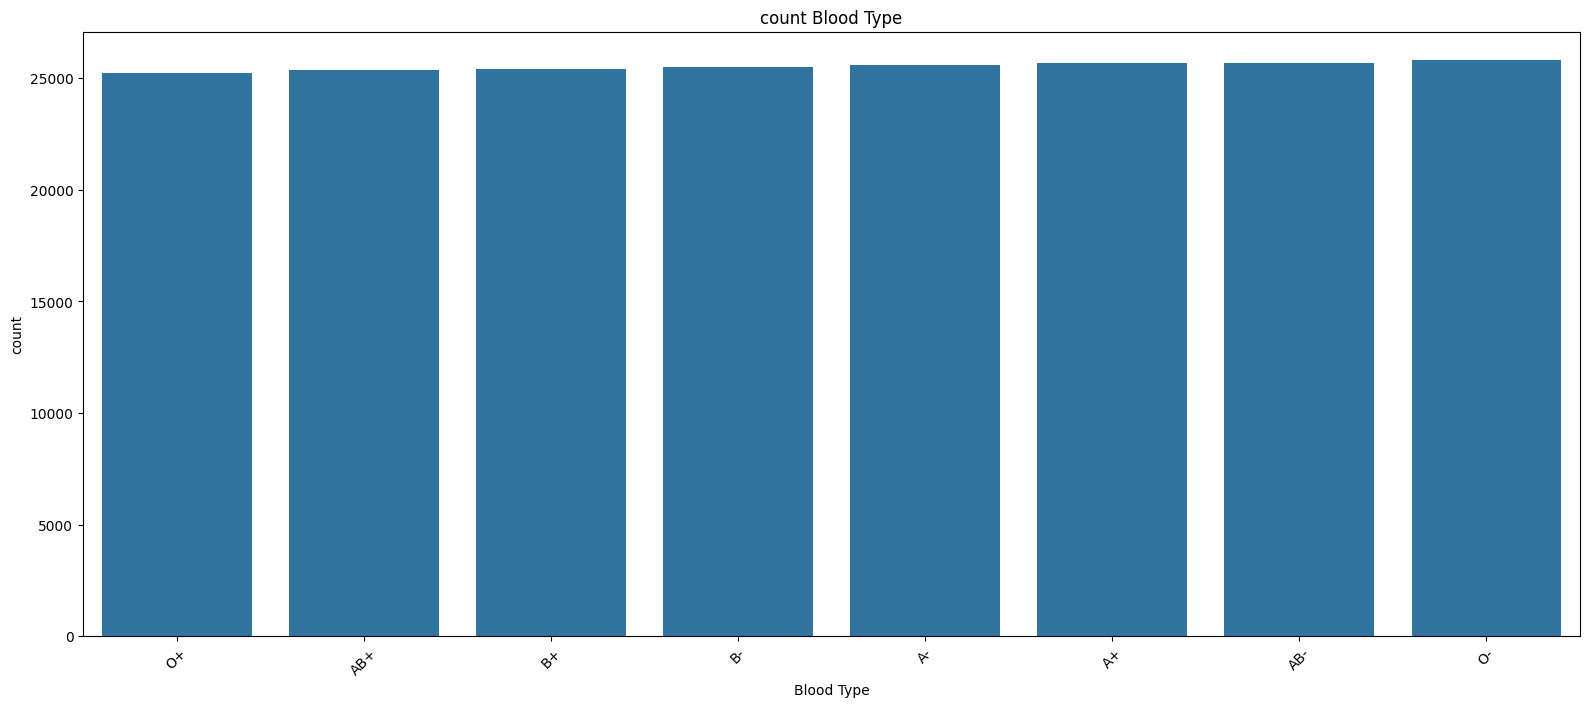

mean Medical Condition : 
                            mean           std
Medical Condition                            
Cancer             25161.792707  14200.271700
Hypertension       25497.095761  14305.400942
Arthritis          25497.327056  14276.529904
Asthma             25635.249359  14241.677464
Diabetes           25638.405577  14159.524315
Obesity            25805.971259  14079.526507


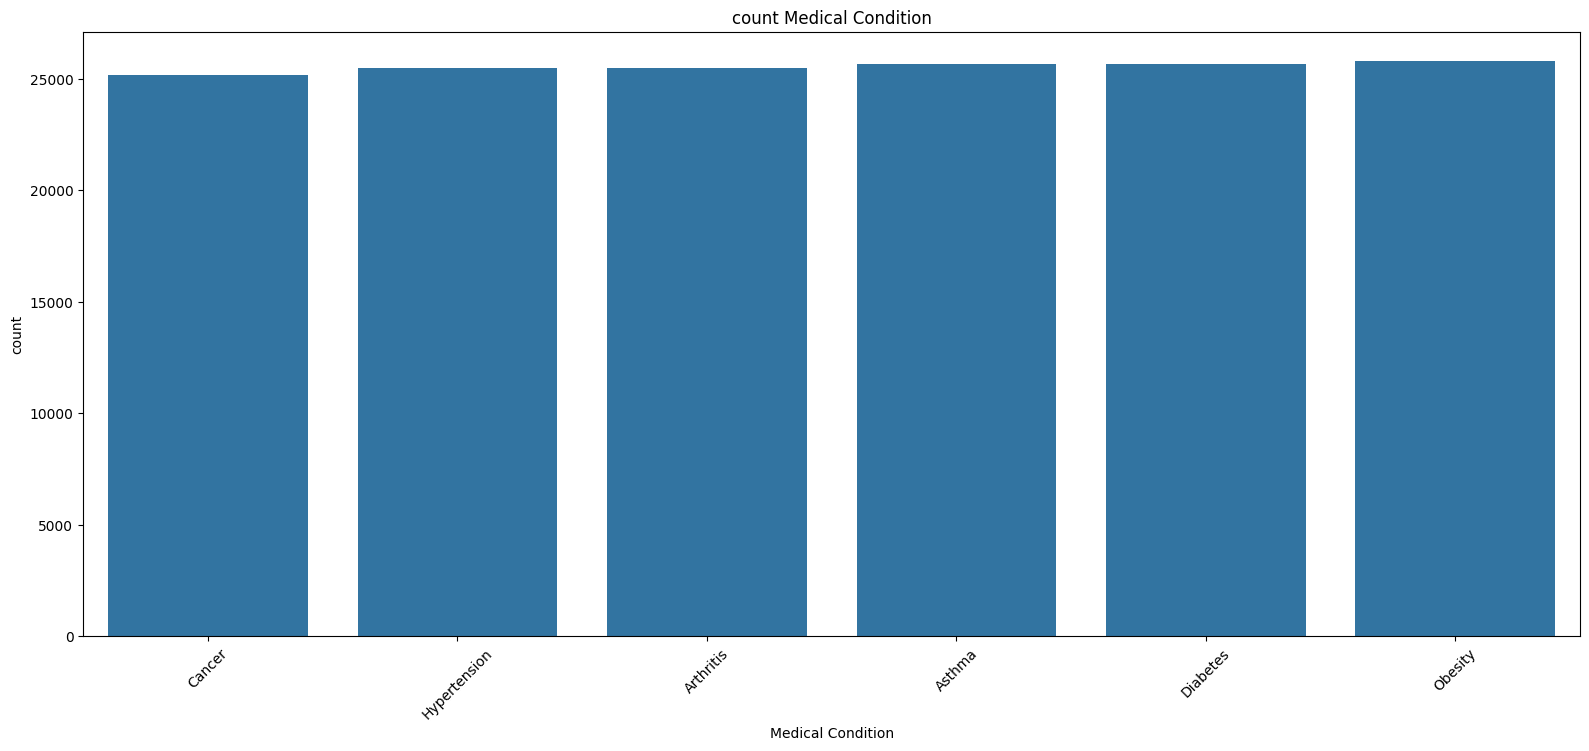

mean Insurance Provider : 
                             mean           std
Insurance Provider                            
UnitedHealthcare    25389.172390  14291.568769
Cigna               25525.766314  14241.214680
Aetna               25553.294506  14269.230818
Blue Cross          25613.011503  14113.622237
Medicare            25615.990508  14142.480543


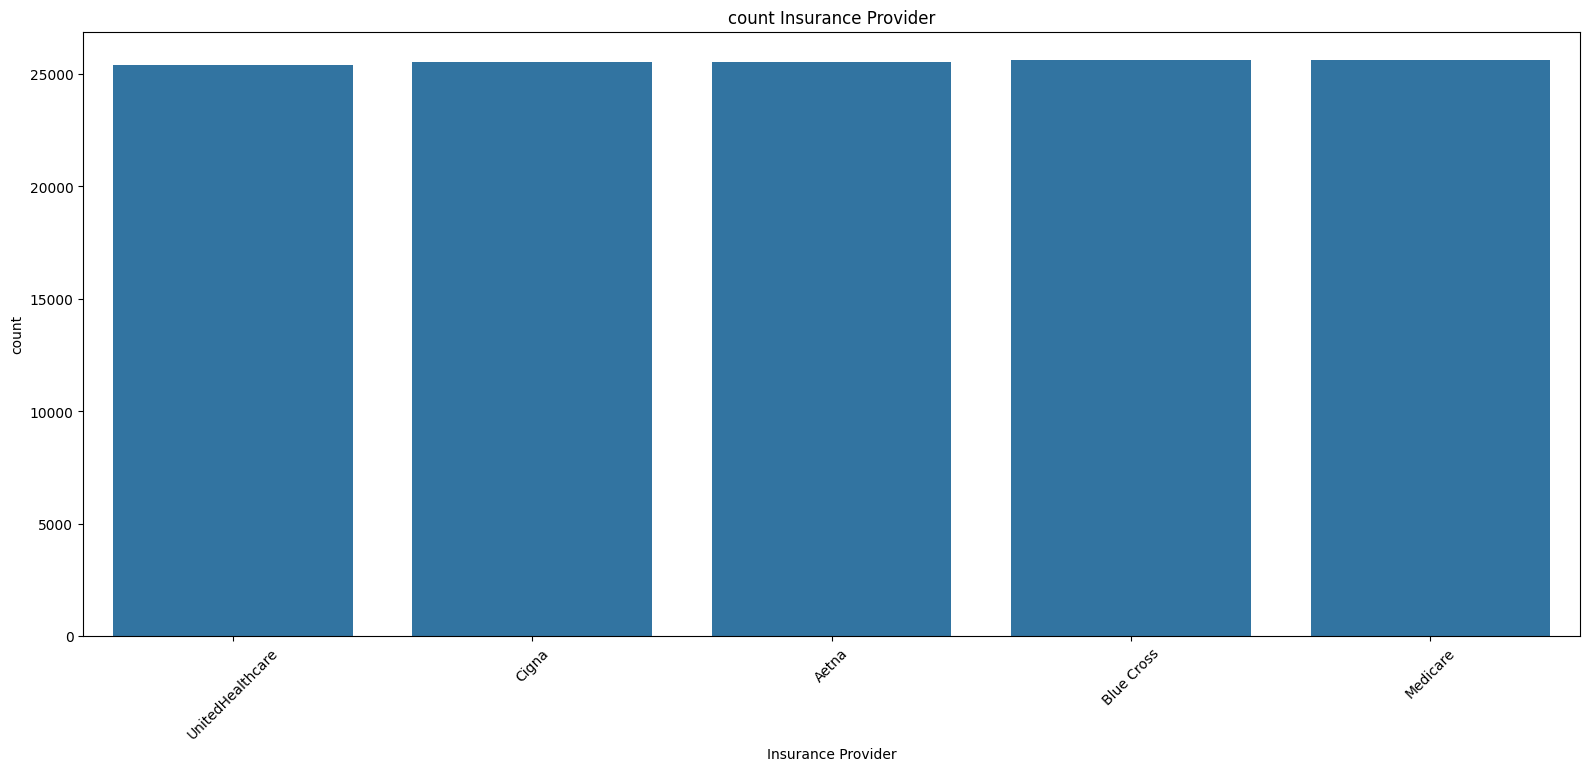

mean Admission Type : 
                         mean           std
Admission Type                            
Emergency       25497.397157  14163.005577
Urgent          25517.364497  14242.632174
Elective        25602.226311  14228.275326


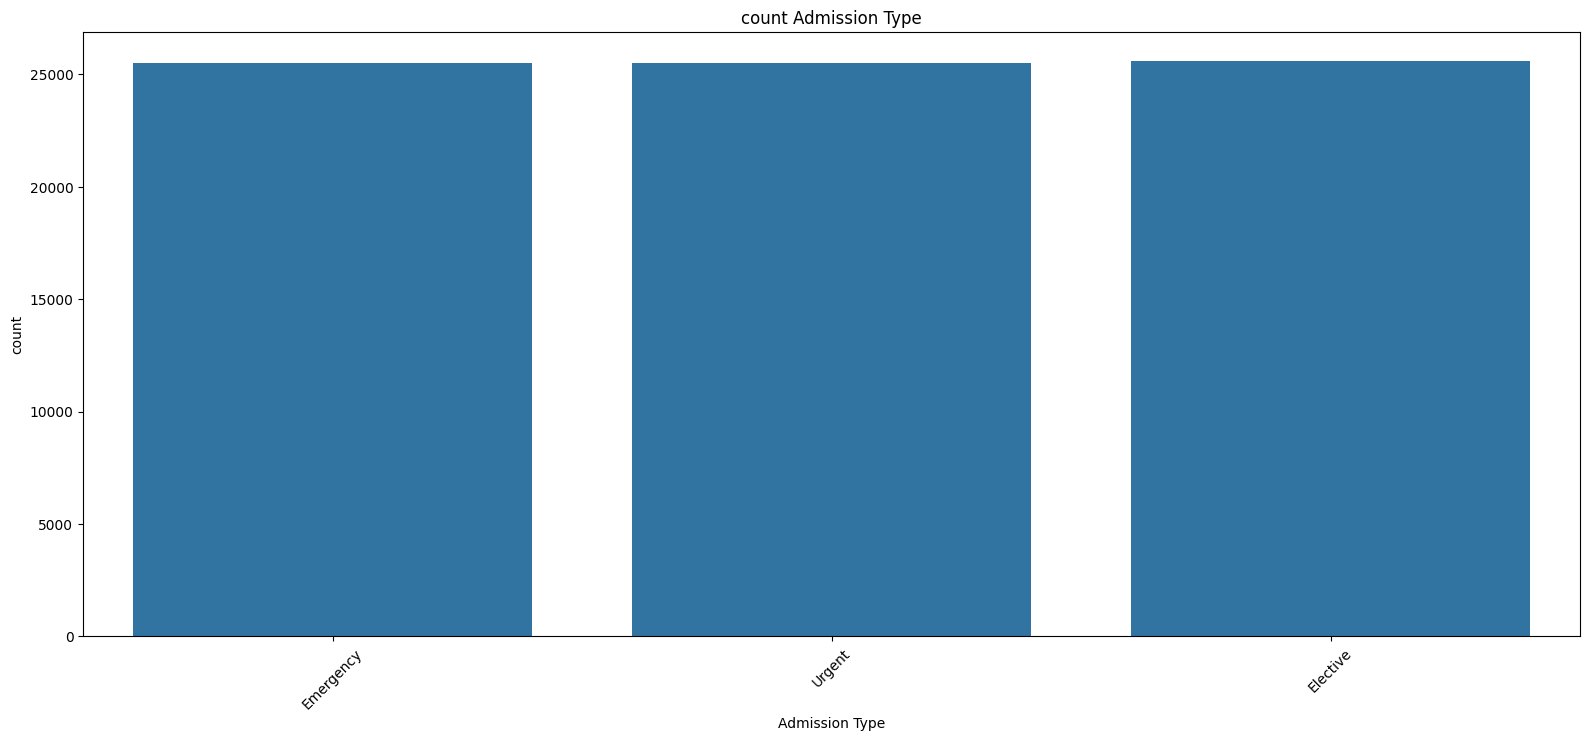

mean Medication : 
                      mean           std
Medication                             
Lipitor      25342.468884  14228.058270
Penicillin   25490.917427  14203.246562
Paracetamol  25533.470236  14157.653087
Aspirin      25594.255074  14322.388883
Ibuprofen    25735.575732  14144.864839


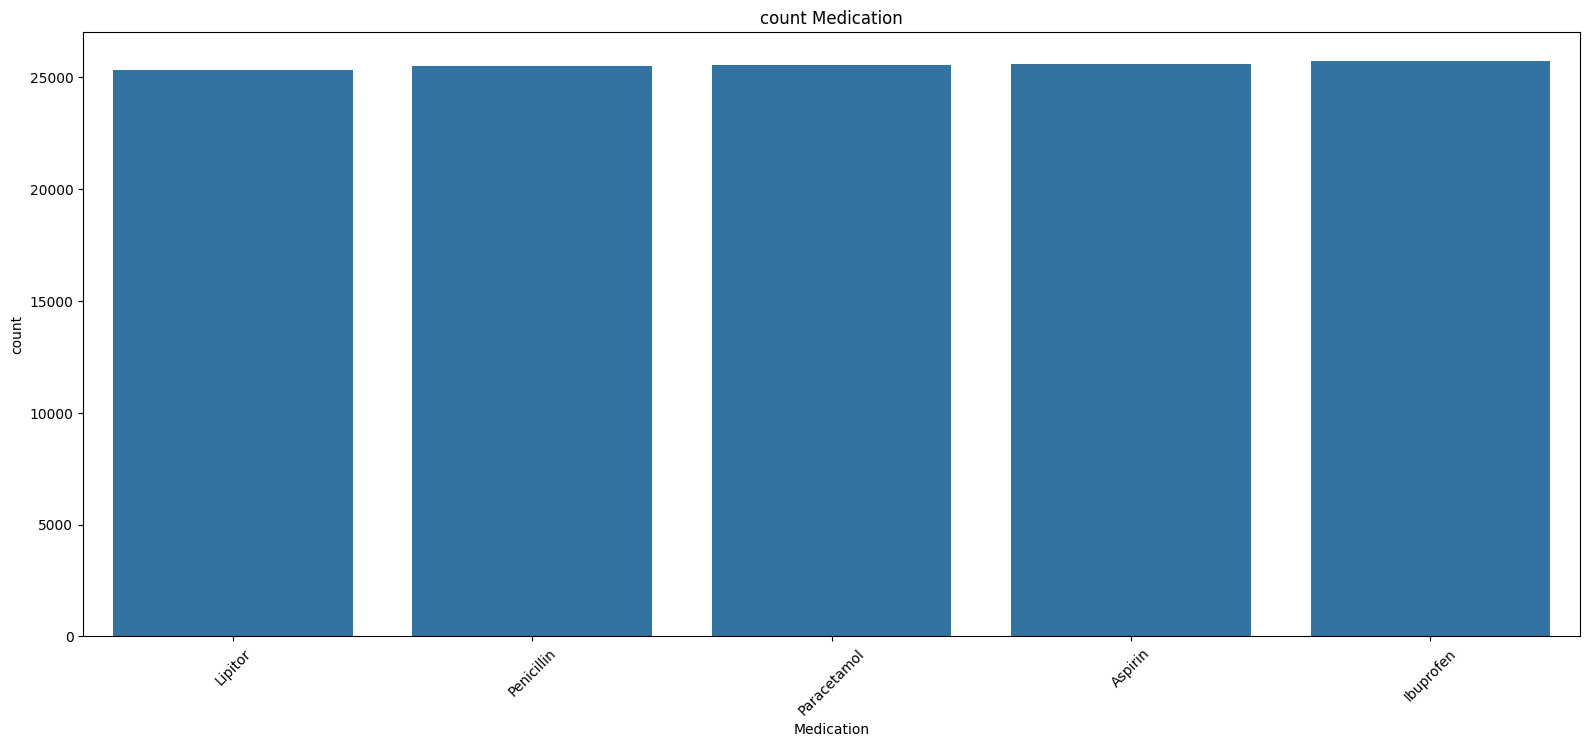

mean Test Results : 
                       mean           std
Test Results                            
Normal        25456.647191  14275.357720
Abnormal      25538.353552  14181.423973
Inconclusive  25623.686846  14177.528023


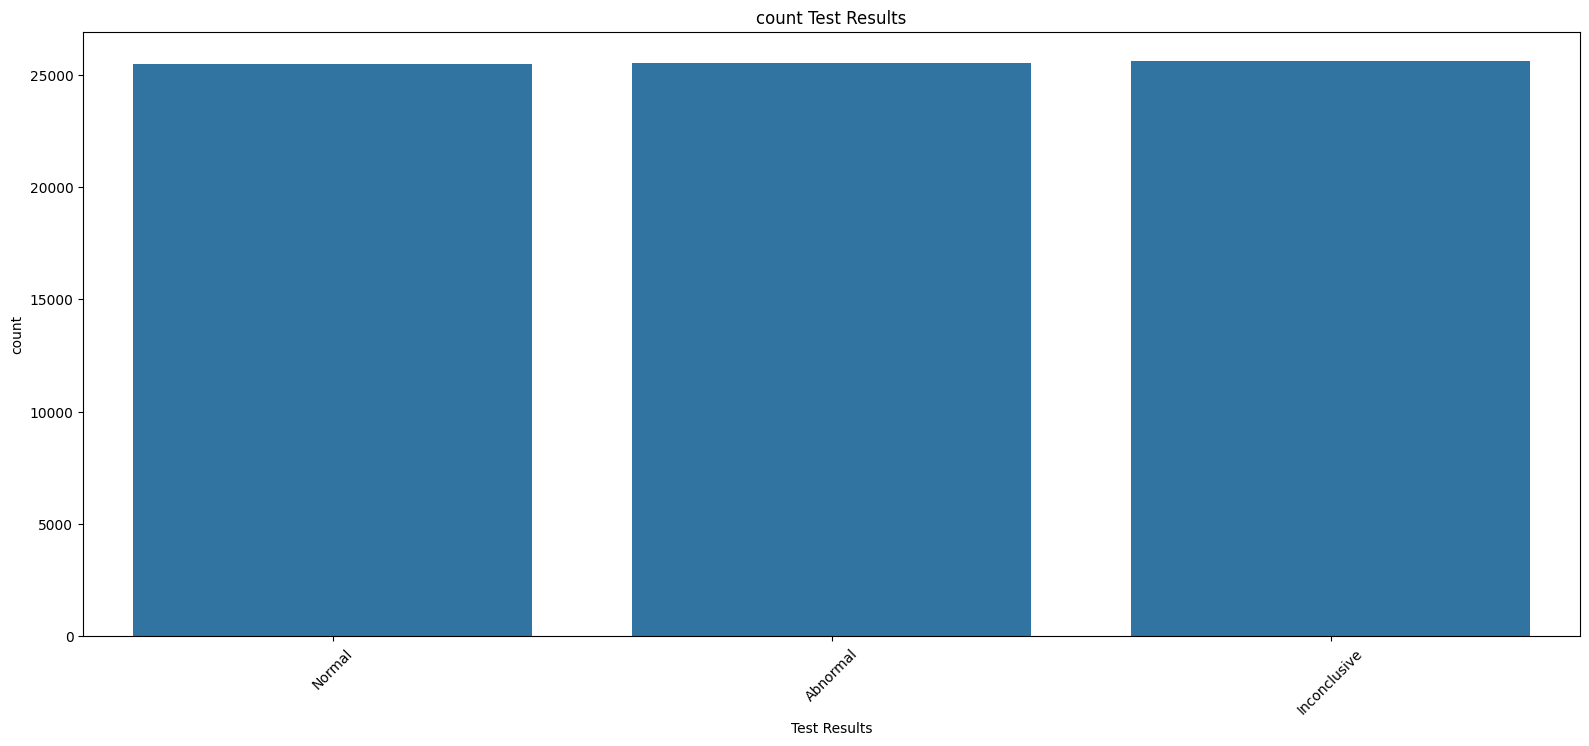

mean day_Admission : 
                        mean           std
day_Admission                            
21             24781.835828  14473.135197
5              24970.340976  14256.762896
20             25112.674938  14300.713801
13             25117.182360  14226.527753
25             25122.164234  14096.083071
17             25163.147408  13822.544801
27             25263.931049  14123.526805
26             25284.334920  14273.979723
18             25401.163638  14251.371512
28             25420.482350  14339.379199
10             25437.377449  14147.042300
30             25481.575688  14098.929007
3              25488.630387  14014.481883
23             25526.078587  14385.548487
31             25549.682754  14218.415208
14             25564.161635  14455.295883
16             25570.717261  14297.054262
2              25624.920334  14385.948427
29             25629.598040  13914.655077
19             25629.656700  14001.284572
4              25712.636757  14273.750969
7          

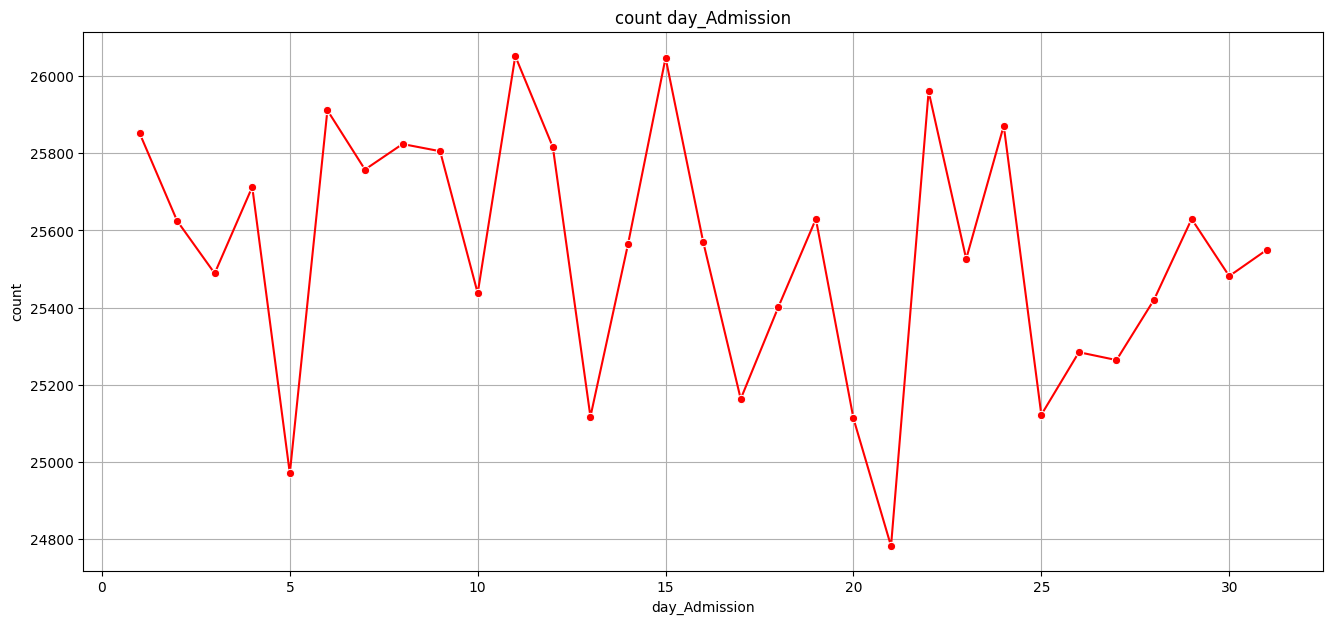

mean month_Admission : 
                          mean           std
month_Admission                            
9                25239.921523  14237.871751
5                25320.295294  14232.821024
4                25356.496746  14016.570402
2                25356.635081  14318.073607
3                25376.796190  14278.947092
8                25385.336919  14156.107638
7                25510.252426  14215.335270
12               25562.292175  14248.662206
1                25688.140608  14274.774047
11               25716.325620  14046.699031
6                25940.997778  14204.980045
10               25991.890451  14297.813008


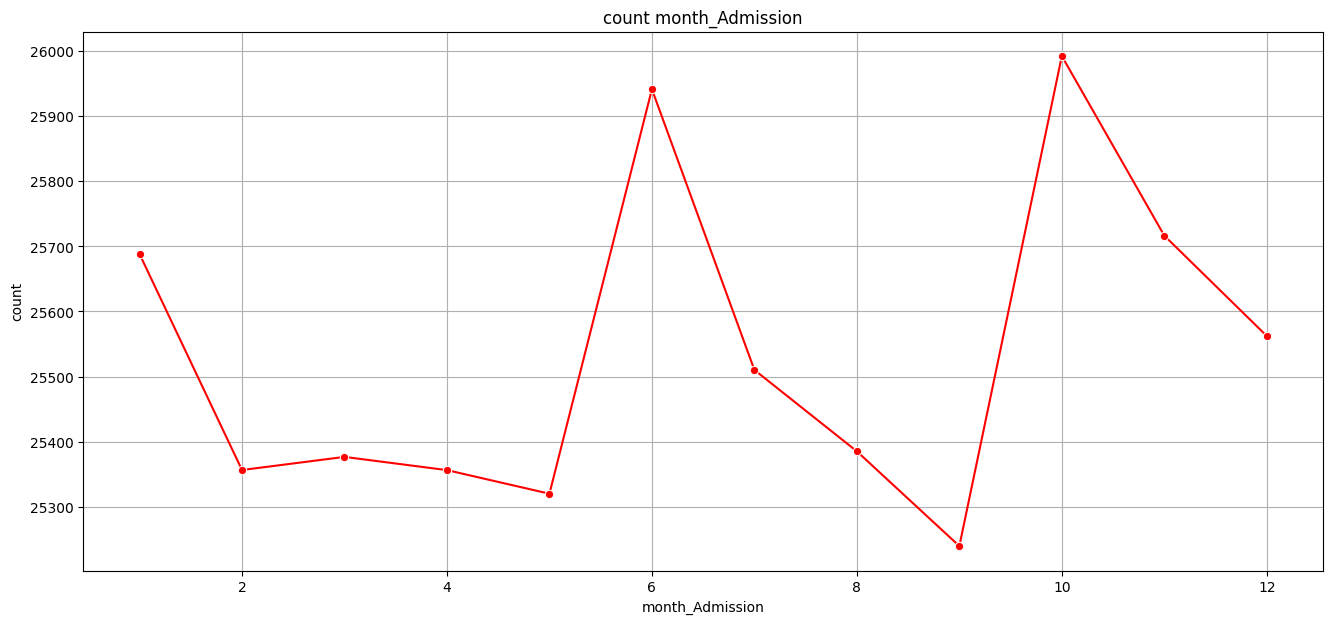

mean year_Admission : 
                         mean           std
year_Admission                            
2024            25380.295013  14158.831856
2020            25392.254250  14228.730770
2022            25513.509808  14197.660756
2023            25573.848469  14173.320711
2021            25629.483239  14284.711859
2019            25700.463671  14182.885394


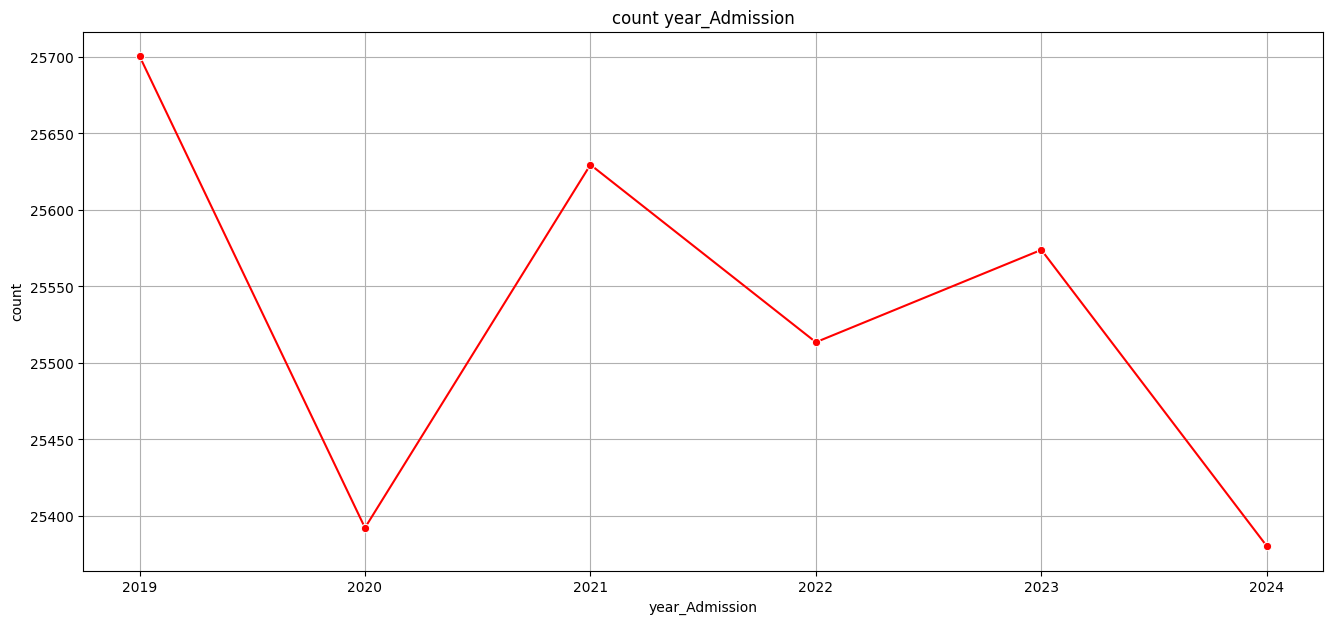

mean week_Admission : 
                         mean           std
week_Admission                            
Sunday          25342.916739  14143.585674
Wednesday       25473.032774  14162.626437
Thursday        25493.471603  14153.341553
Friday          25581.354149  14284.159994
Tuesday         25603.209494  14350.733731
Saturday        25628.512148  14146.478281
Monday          25654.010683  14240.589965


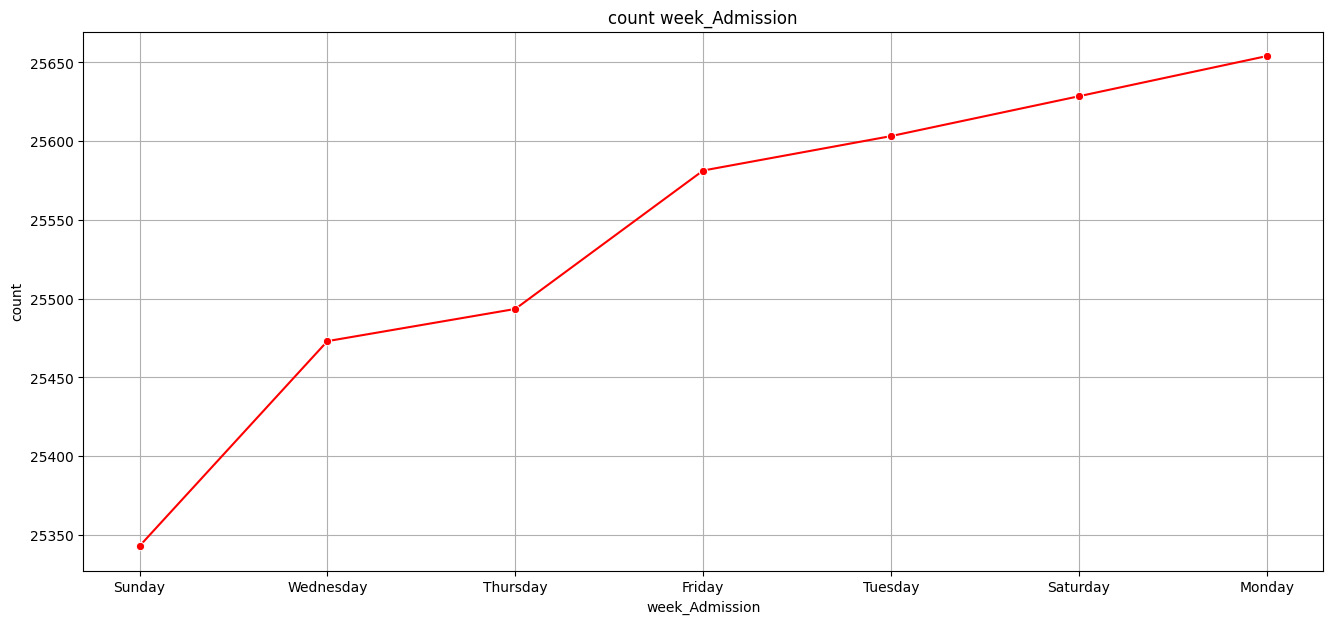

mean day_Discharge : 
                        mean           std
day_Discharge                            
21             24682.437260  14282.288997
31             25009.406629  14063.055255
11             25013.255774  14297.988762
27             25130.537521  14349.155818
14             25156.426005  14016.050963
22             25166.668730  14193.765258
24             25273.723397  13795.422082
1              25299.178044  13862.540673
19             25307.816626  14429.248442
10             25356.925565  14065.808230
13             25376.689654  14496.427924
2              25381.942725  14148.986446
12             25385.088032  14262.479264
3              25425.072275  14119.199011
25             25489.767897  14263.469101
7              25521.580725  14439.660320
6              25537.275974  14302.540603
20             25568.258924  14411.632245
15             25569.571423  14023.826379
18             25588.239830  14077.535195
23             25601.720258  14439.263699
17         

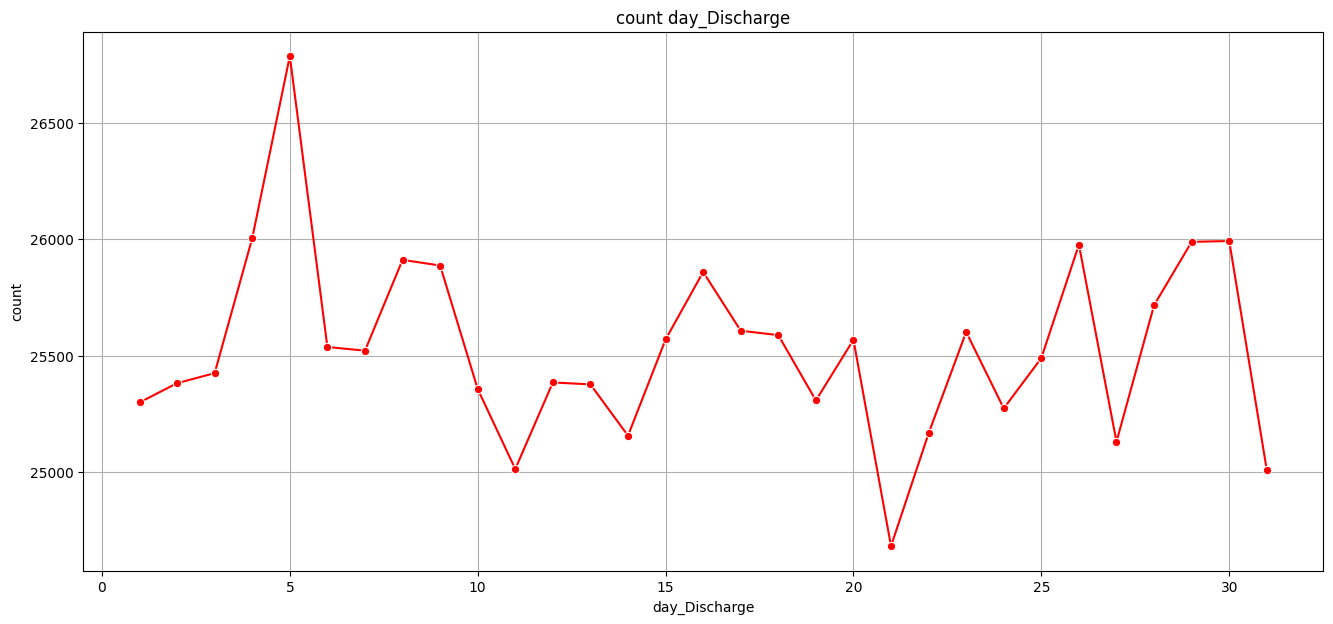

mean month_Discharge : 
                          mean           std
month_Discharge                            
9                25097.626894  14135.545136
4                25128.250398  14185.039232
1                25317.273547  14286.930205
8                25408.247618  14217.076067
5                25476.044307  13976.717487
6                25526.141312  14336.627613
3                25580.056704  14313.031674
2                25598.831553  14269.322356
12               25749.202725  14070.198464
11               25785.068021  14143.768222
7                25842.317734  14192.519907
10               25960.714979  14400.486667


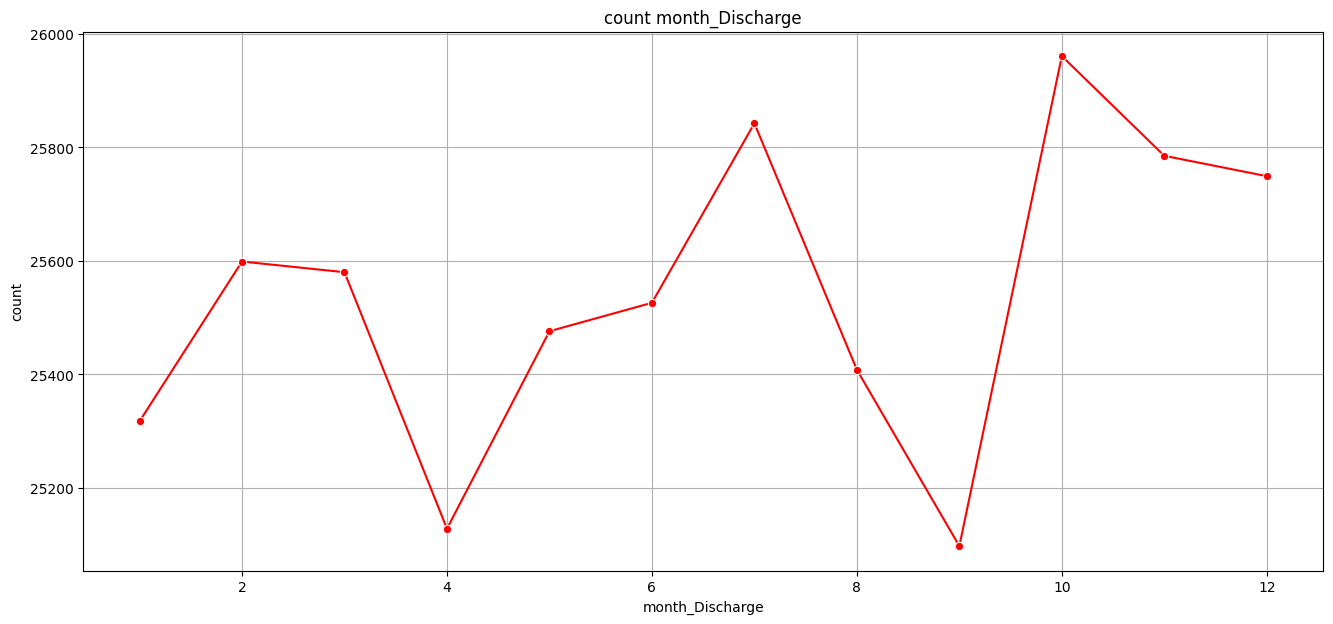

mean year_Discharge : 
                         mean           std
year_Discharge                            
2020            25332.941054  14214.051005
2024            25366.621289  14157.232040
2022            25523.505029  14178.696642
2023            25546.413924  14180.946141
2021            25689.923252  14315.824377
2019            25760.653093  14175.790694


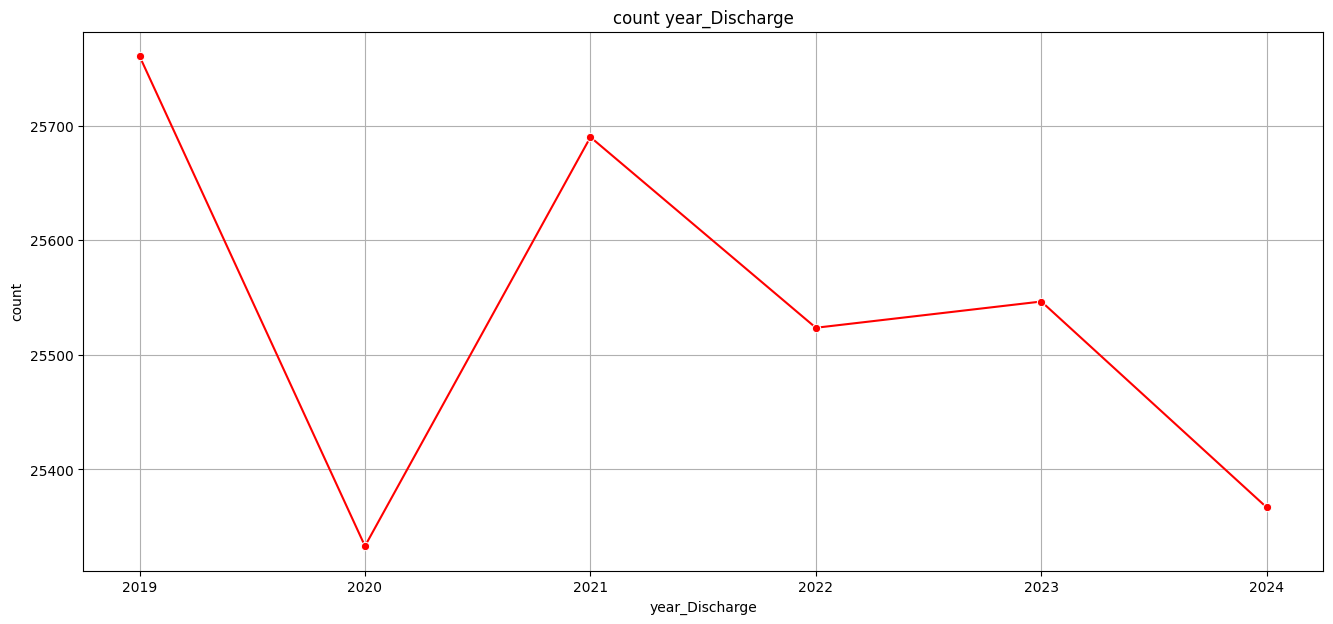

mean week_Discharge : 
                         mean           std
week_Discharge                            
Friday          25227.576777  14160.757128
Thursday        25395.830230  14282.390662
Saturday        25542.475717  14008.822661
Sunday          25580.411253  14277.293690
Monday          25587.480910  14239.625357
Wednesday       25719.074665  14349.337582
Tuesday         25730.717229  14155.145314


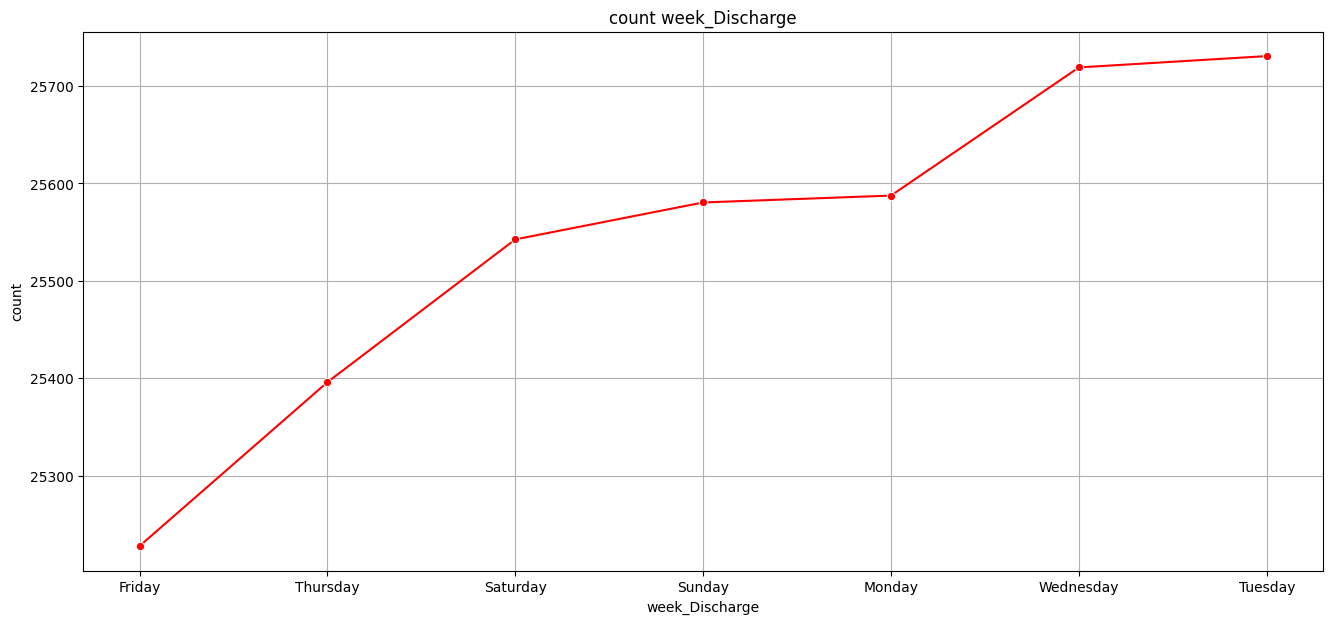

In [10]:
# a function to get the mean bill value per categroy
def mean_col(col):
    df = data.groupby(col)['Billing Amount'].agg(['mean' , 'std']).sort_values(by = 'mean')
    print(f'mean {col} : \n {df}')
    return df
# to plot a bar chart
for col in columns: 
    df2 = mean_col(col)
    plot_bar_chart(df2.index , df2['mean'] , col)
# to plot a line chart
for col in columns_date:
    df3 = mean_col(col)
    line_plot_dubel(df3.index , df3['mean'] , col)

- The mean billing amount for males (25,607.86) is slightly higher than females (25,470.65), but the difference is minimal.The standard deviations are similar, indicating comparable variability in billing amounts across genders.This suggests that gender is not a significant factor affecting the average billing amount in this dataset.
- Mean billing amounts vary slightly across medical conditions.The lowest mean billing was for Cancer patients (25,161.79), while the highest was for Obesity (25,805.97).Standard deviations are relatively close across conditions, indicating similar billing variability.Overall, there are no major differences in mean billing amounts between medical conditions.
- Mean billing amounts vary slightly between insurance providers.The highest mean billing amount was for Medicare (25,615.99), and the lowest for UnitedHealthcare (25,389.17).Standard deviations are fairly close, indicating similar billing variability across providers.Overall, there are no significant differences in mean billing amounts among the insurance providers.
- Mean billing amounts slightly increase from Emergency to Elective admission types.The highest mean billing amount was for Elective admissions at 25,602.23.Differences in means are small, and standard deviations are close, indicating similar billing variability across admission types.
- Mean billing amounts gradually increase with some medications, with the highest mean recorded for Ibuprofen.The lowest mean billing amount was for Lipitor.Standard deviations are similar, indicating comparable billing amount variability across different medications.Differences in means are relatively small.
- Mean billing amounts slightly increase from Normal to Inconclusive test results.The highest mean billing amount was recorded for Inconclusive results.Differences in means are small, and standard deviations are similar across the three groups, indicating comparable billing distribution regardless of test outcomes.
- There is variability in mean billing amounts across different days.The lowest mean billing amount was on day 21 (24,781.84).The highest mean billing amounts were recorded on days 6, 11, 15, and 22, exceeding 25,900.
- Mean billing amounts tend to be higher in late spring and summer months (June, July, October).Lower means are observed in early spring (March, April, May) and early fall (September).Differences between months are not very large but might reflect seasonal variations in case types or treatments.
- The highest mean billing amount was in 2019 compared to other years.From 2020 to 2024, there is a gradual increase in mean billing amounts with some fluctuations, with the lowest mean in 2024 and the highest in 2021.
- The mean billing amount tends to gradually increase from Sunday to Monday.The highest mean billing was observed on Monday, with Sunday having the lowest.Differences across weekdays are not very large, indicating relative stability in billing amounts throughout the week.
- The mean billing amount varies across different discharge days of the month.The highest mean billing amount was on the 5th day (around 26,786), noticeably higher than other days.The lowest mean billing was on the 21st day (around 24,682).Other days fluctuate around 25,000 to 26,000.
- The mean billing amount generally increases gradually from the beginning to the end of the year.The lowest mean billing was in September (month 9), around 25,098.The highest mean billing was in October (month 10), around 25,961.The standard deviation is relatively consistent across months, indicating similar variability in billing amounts throughout the year.
- There is a gradual increase in the mean billing amount from 2019 to 2021.The years 2019 and 2021 have the highest mean billing amounts.The standard deviation remains relatively consistent over the years, indicating similar variability in yearly billing costs.
- The mean billing amount is lowest on Friday compared to other weekdays.The highest mean billing amount is recorded on Tuesday.The standard deviation is relatively consistent, indicating similar variability in daily billing costs.

Gender VS Medical Condition : 
 Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Gender                                                                       
Female                  4686    4553    4602      4651          4612     4622
Male                    4622    4632    4625      4653          4633     4609


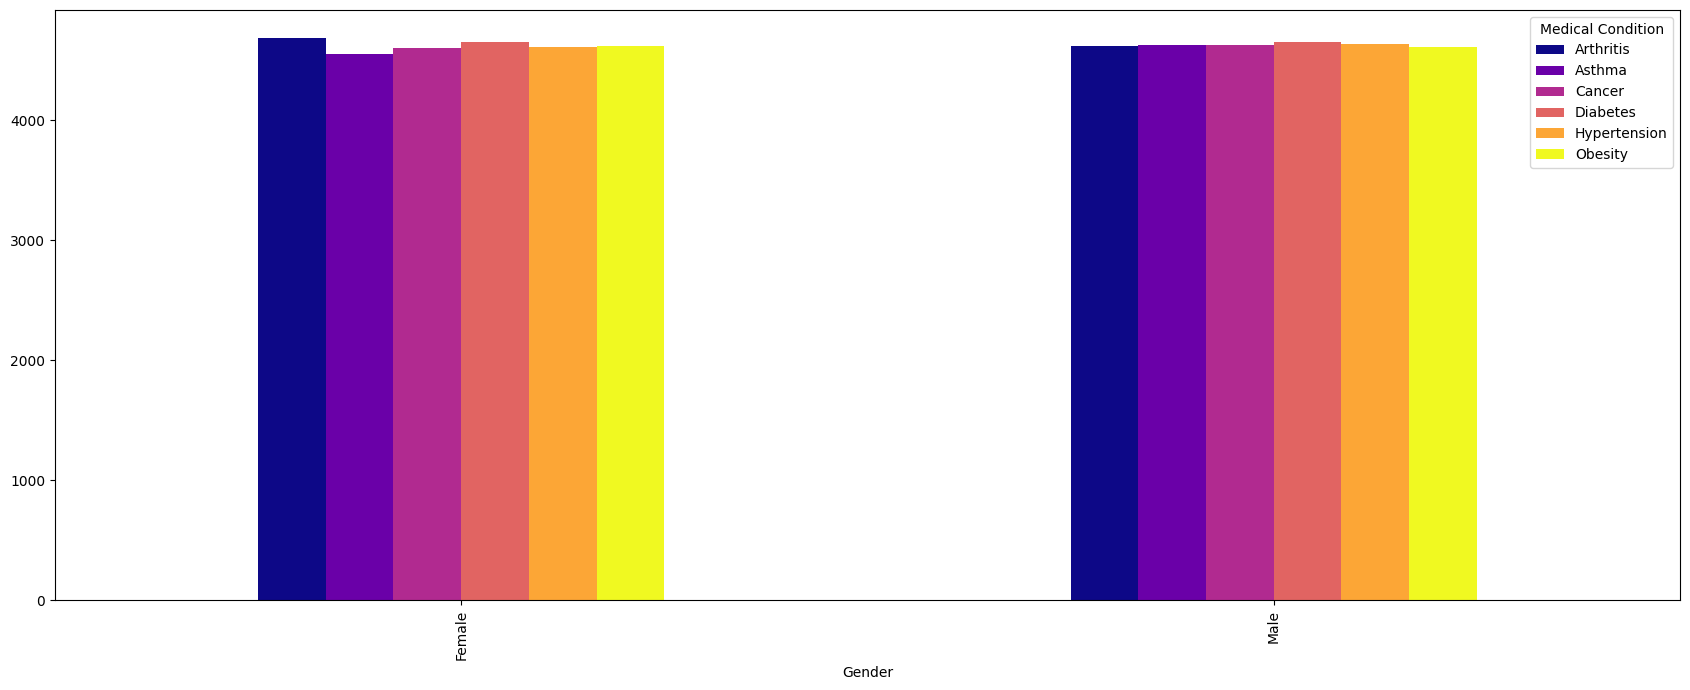

Gender VS Insurance Provider : 
 Insurance Provider  Aetna  Blue Cross  Cigna  Medicare  UnitedHealthcare
Gender                                                                  
Female               5382        5565   5652      5575              5552
Male                 5531        5494   5597      5579              5573


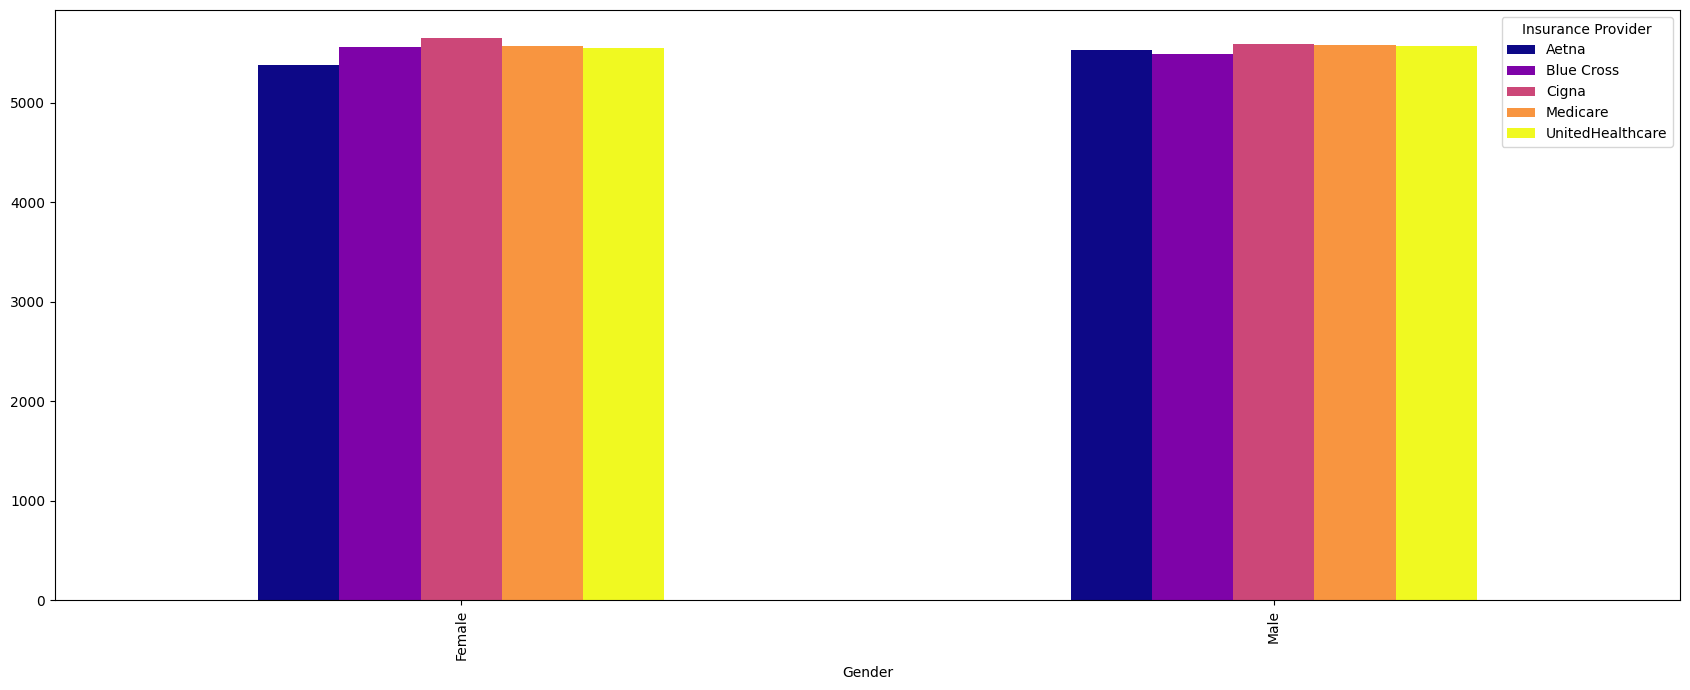

Gender VS Admission Type : 
 Admission Type  Elective  Emergency  Urgent
Gender                                     
Female              9374       9244    9108
Male                9281       9025    9468


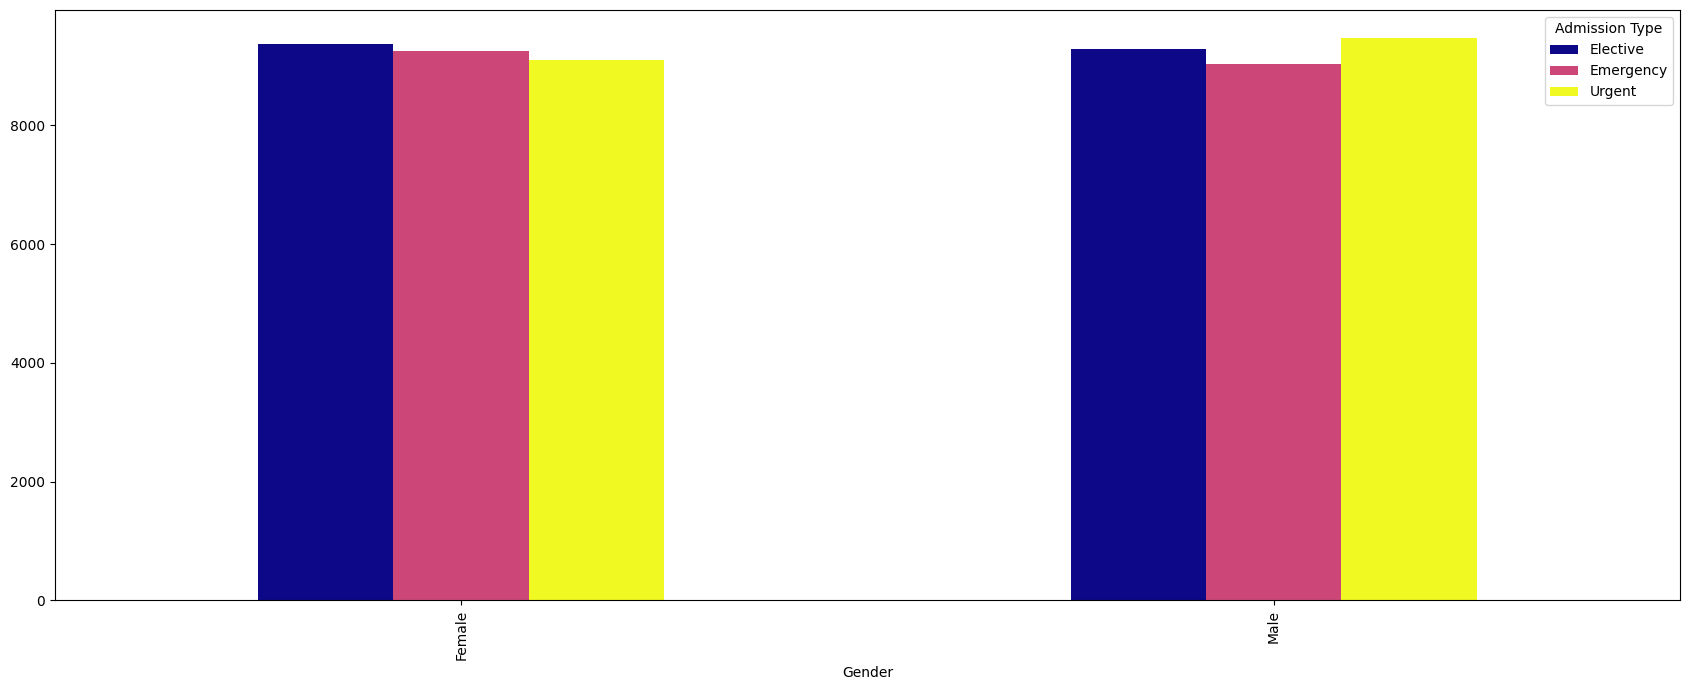

Gender VS Medication : 
 Medication  Aspirin  Ibuprofen  Lipitor  Paracetamol  Penicillin
Gender                                                          
Female         5622       5593     5551         5432        5528
Male           5472       5534     5589         5639        5540


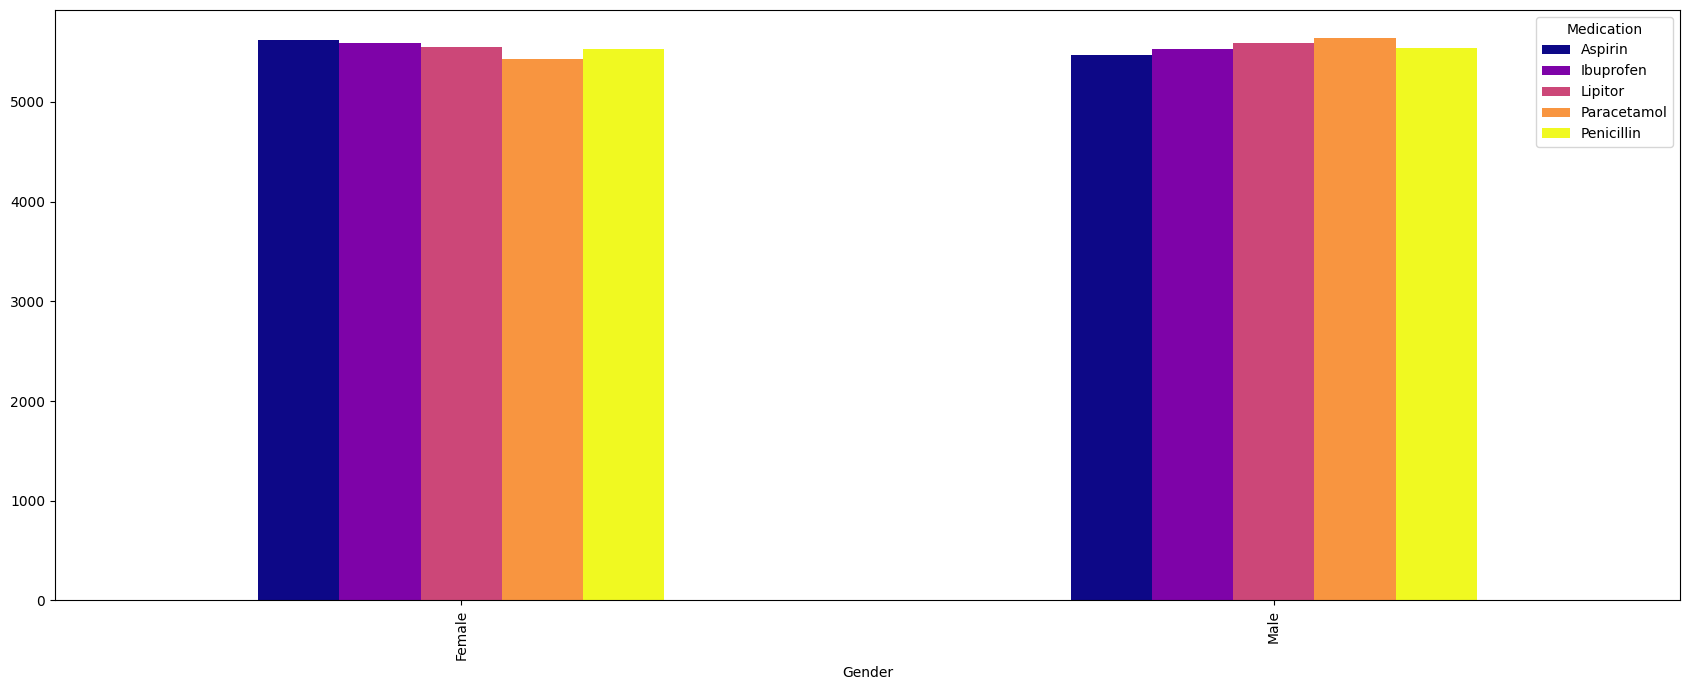

Gender VS Test Results : 
 Test Results  Abnormal  Inconclusive  Normal
Gender                                      
Female            9338          9216    9172
Male              9289          9140    9345


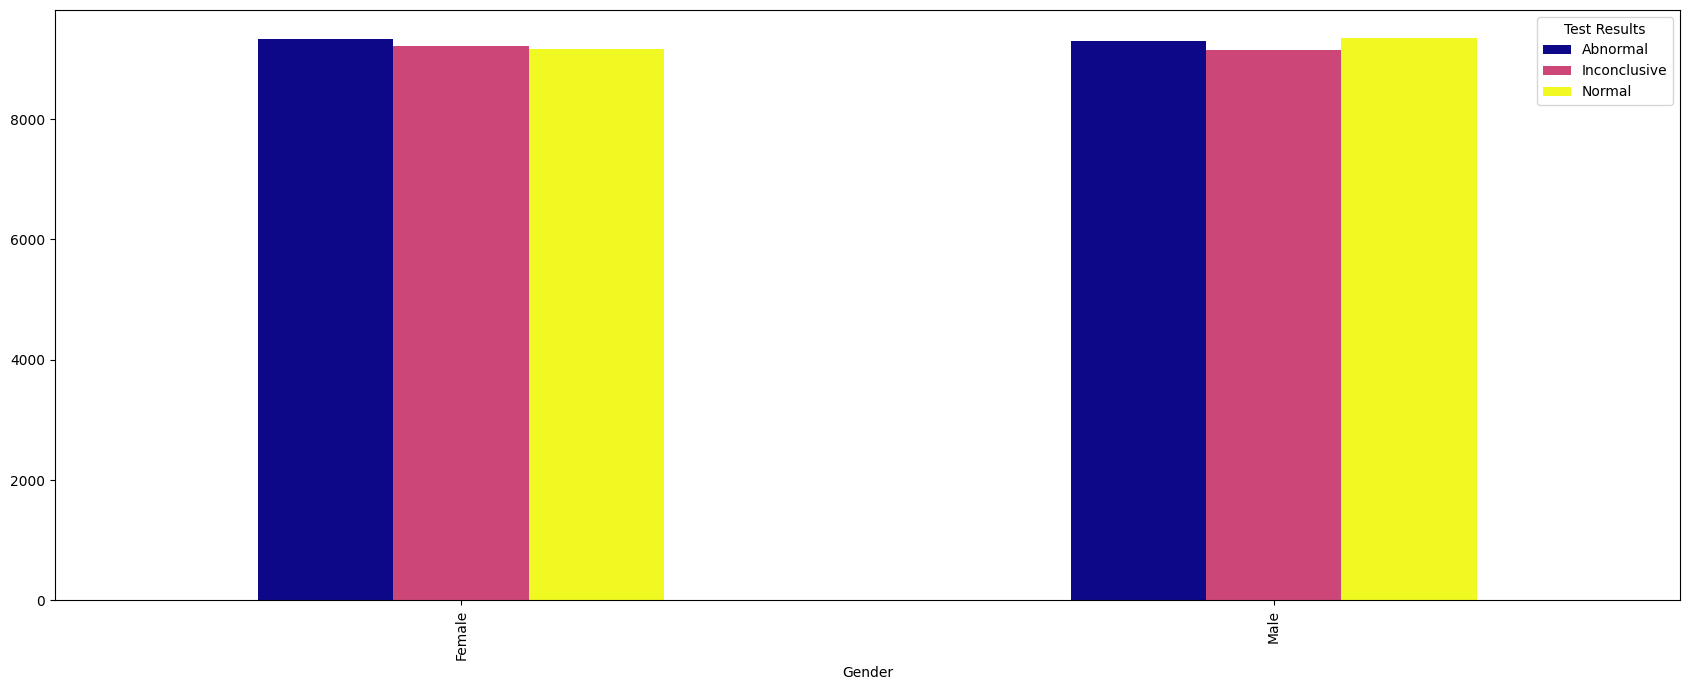

Medical Condition VS Blood Type : 
 Blood Type           A+    A-   AB+   AB-    B+    B-    O+    O-
Medical Condition                                                
Arthritis          1116  1153  1130  1192  1201  1169  1198  1149
Asthma             1135  1173  1189  1134  1108  1119  1173  1154
Cancer             1185  1134  1112  1198  1196  1144  1108  1150
Diabetes           1213  1167  1173  1139  1188  1151  1151  1122
Hypertension       1128  1199  1215  1125  1103  1173  1157  1145
Obesity            1179  1143  1128  1157  1149  1188  1130  1157


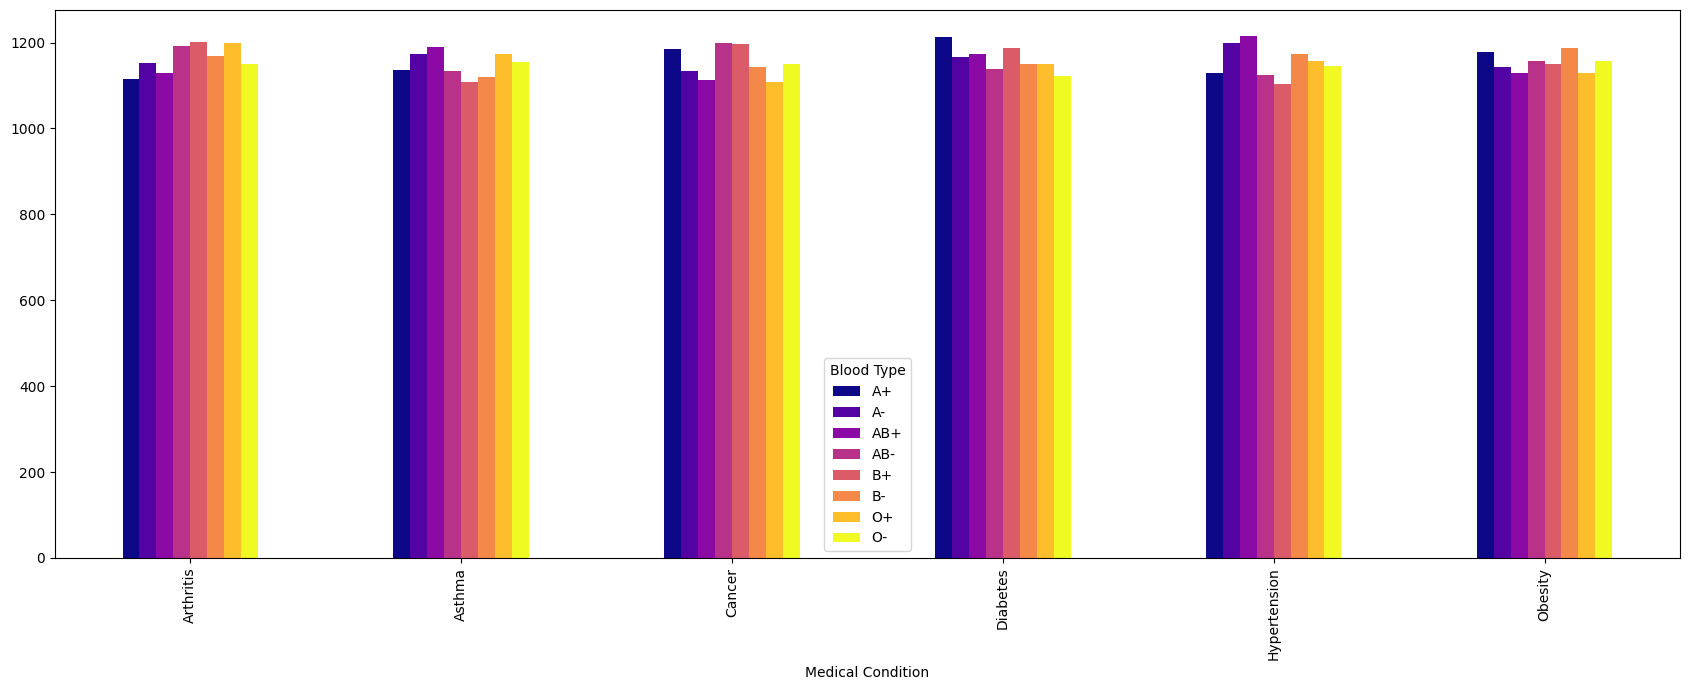

Medical Condition VS Medication : 
 Medication         Aspirin  Ibuprofen  Lipitor  Paracetamol  Penicillin
Medical Condition                                                      
Arthritis             1918       1822     1825         1877        1866
Asthma                1802       1827     1823         1888        1845
Cancer                1786       1873     1922         1853        1793
Diabetes              1858       1861     1893         1811        1881
Hypertension          1865       1893     1848         1849        1790
Obesity               1865       1851     1829         1793        1893


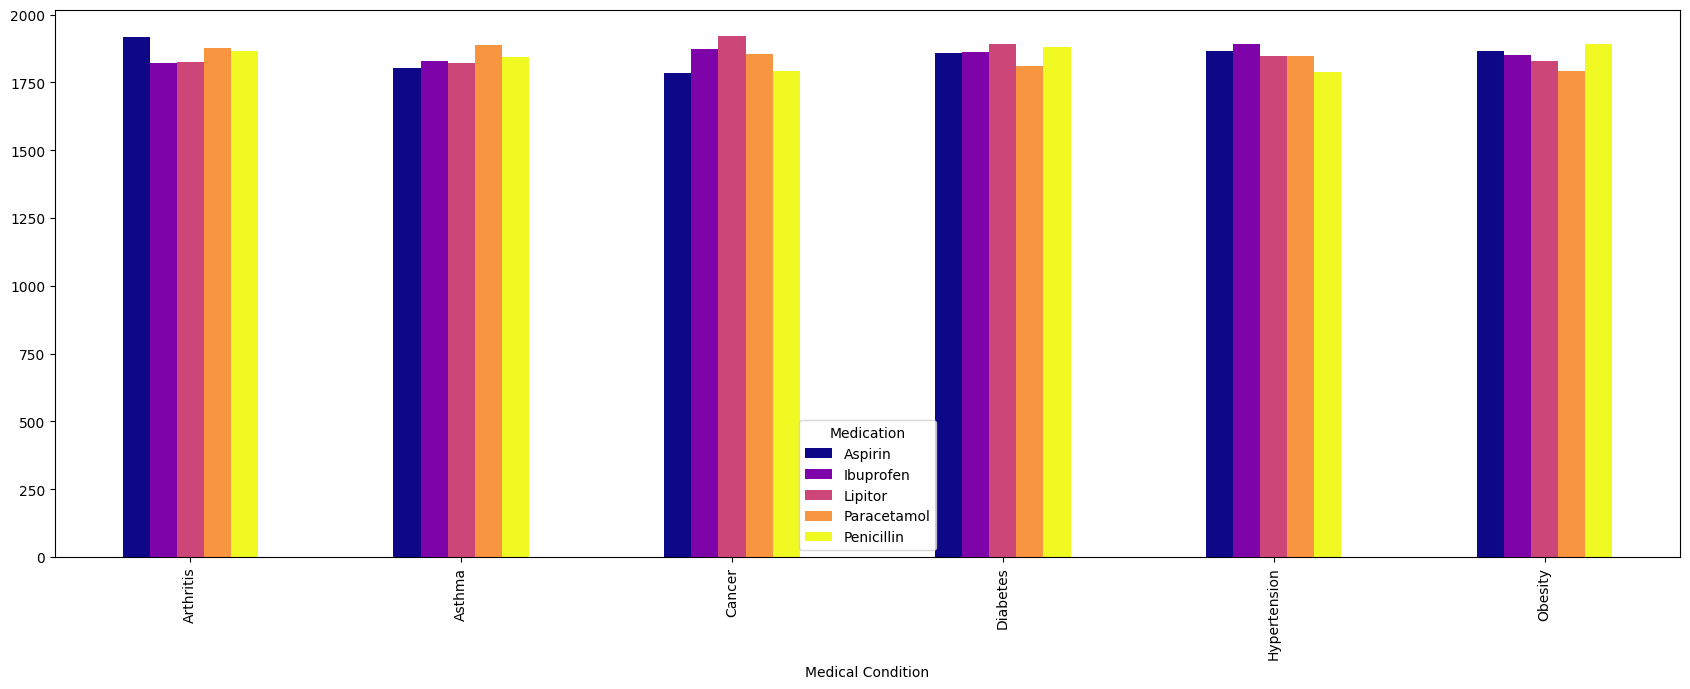

Medical Condition VS Test Results : 
 Test Results       Abnormal  Inconclusive  Normal
Medical Condition                                
Arthritis              3188          3088    3032
Asthma                 3009          3029    3147
Cancer                 3118          3060    3049
Diabetes               3168          3046    3090
Hypertension           3012          3091    3142
Obesity                3132          3042    3057


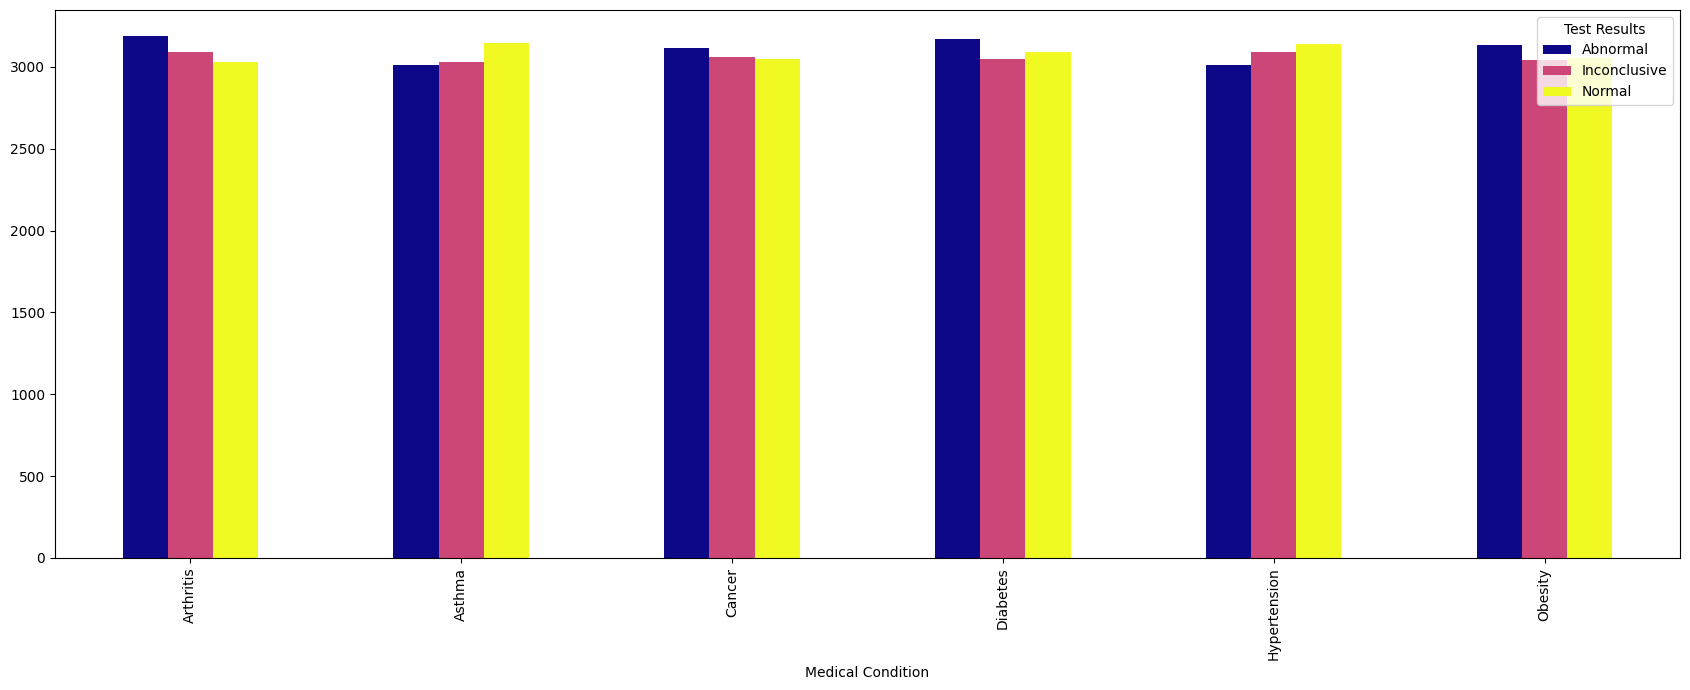

Medical Condition VS Admission Type : 
 Admission Type     Elective  Emergency  Urgent
Medical Condition                             
Arthritis              3083       3108    3117
Asthma                 3102       3002    3081
Cancer                 3148       3015    3064
Diabetes               3058       3017    3229
Hypertension           3221       3001    3023
Obesity                3043       3126    3062


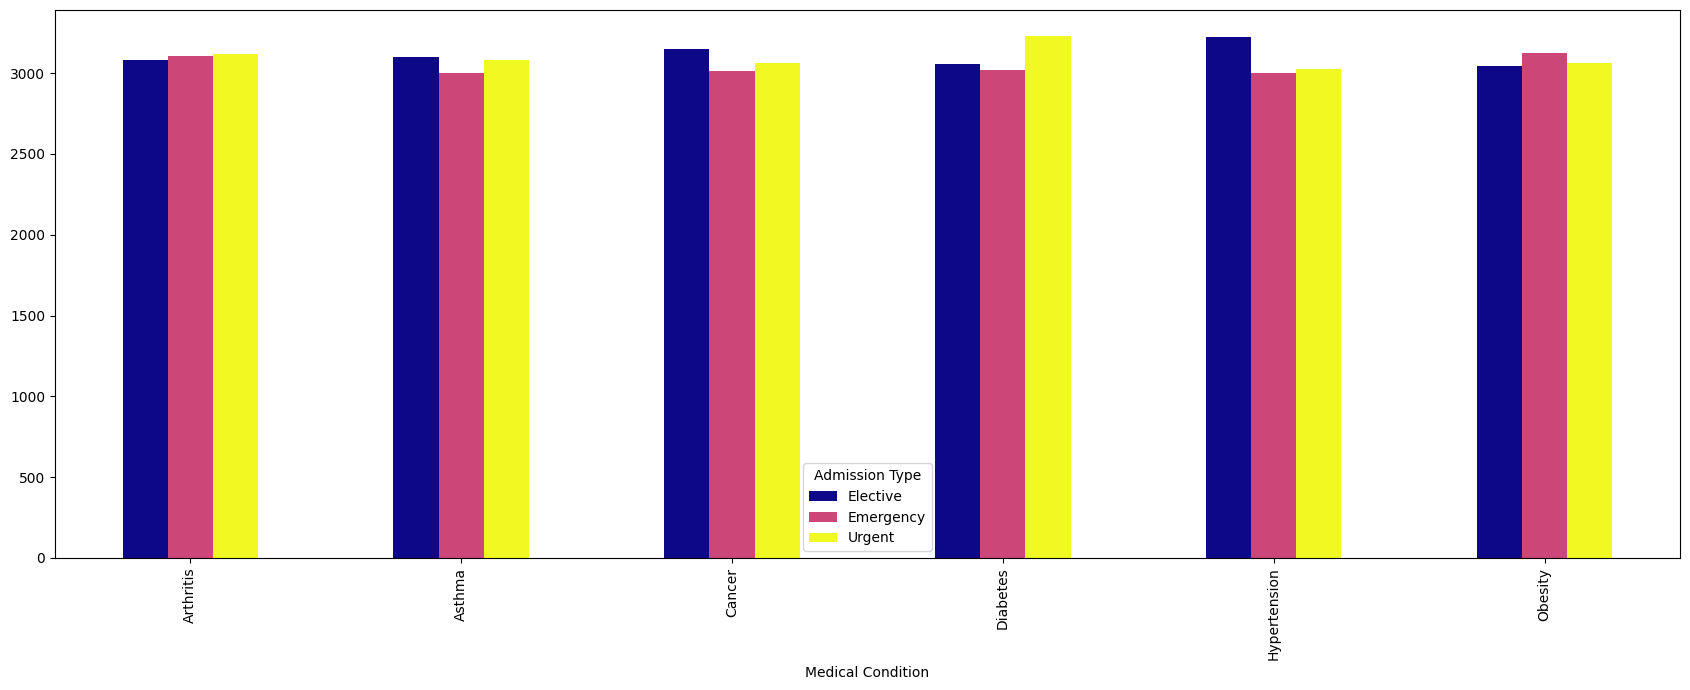

Admission Type VS Test Results : 
 Test Results    Abnormal  Inconclusive  Normal
Admission Type                                
Elective            6296          6118    6241
Emergency           6091          6072    6106
Urgent              6240          6166    6170


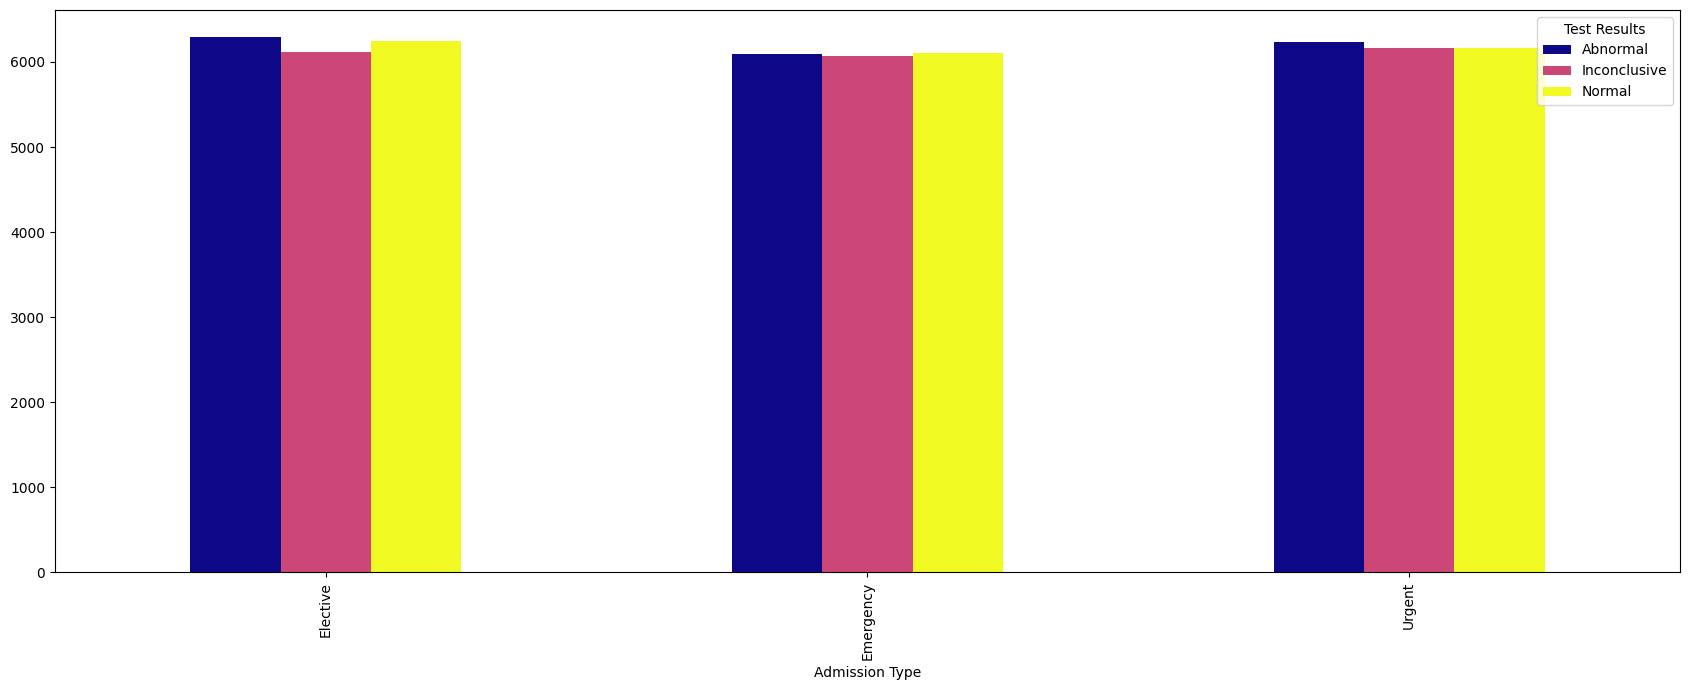

Admission Type VS Blood Type : 
 Blood Type        A+    A-   AB+   AB-    B+    B-    O+    O-
Admission Type                                                
Elective        2345  2342  2298  2385  2246  2326  2333  2380
Emergency       2291  2269  2294  2267  2357  2266  2299  2226
Urgent          2320  2358  2355  2293  2342  2352  2285  2271


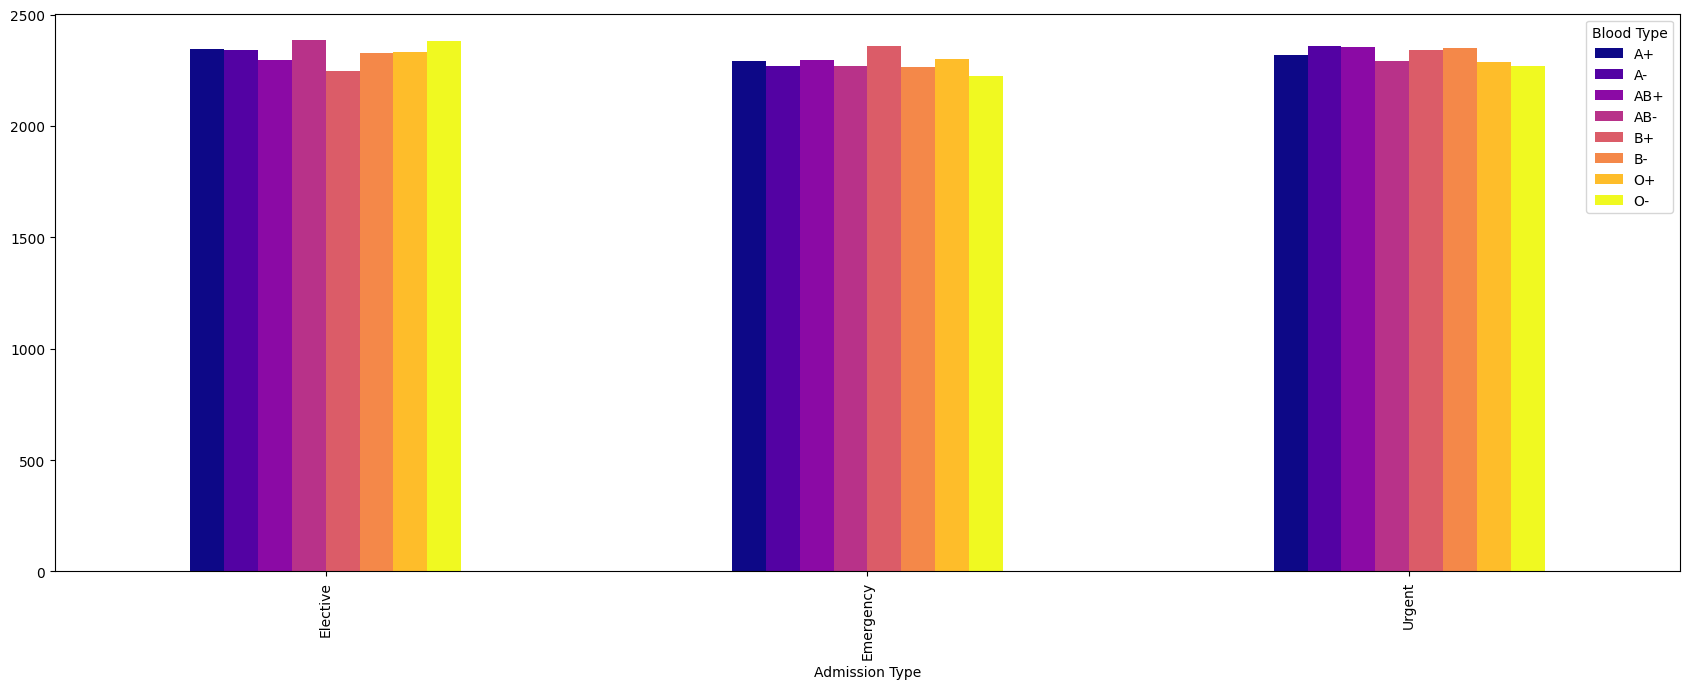

In [11]:
column = ['Medical Condition' , 'Insurance Provider' , 'Admission Type' , 'Medication' , 'Test Results']
column2 = ['Blood Type','Medication' , 'Test Results' ,'Admission Type']
column3 = ['Test Results' , 'Blood Type']
# a function to comppare the columns
def comparison(col1 , col2):
    cro_df = pd.crosstab(data[col1], data[col2])
    print(f'{col1} VS {col2} : \n {cro_df}')
    cro_df.plot(kind= 'bar' , cmap = 'plasma' , figsize=(17,7))
    plt.tight_layout()
    plt.show()
# compare columns by 'Gender'
for col in column:
    comparison('Gender' , col)
# compare columns by 'Medical Condition'
for col in column2:
    comparison('Medical Condition' , col)
# compare columns by 'Admission Type'
for col in column3:
    comparison('Admission Type' , col)

- The counts between males and females are quite close across most medical conditions.Males have slightly higher numbers in Asthma, Diabetes, and Hypertension.Arthritis cases are slightly higher in females.Overall, the distribution between genders is relatively balanced for each medical condition.

- The distribution between males and females is quite close across most insurance providers.Females have slightly higher counts in Blue Cross and Cigna.Males have slightly higher counts in Aetna, UnitedHealthcare, and Medicare.Overall, there are no significant gender differences regarding insurance providers.

- Females have a slightly higher count in Elective and Emergency admissions.Males have a higher count in Urgent admissions.The differences between genders are small, indicating a relative balance in admission types.

- Females and males have very close numbers in taking Aspirin, Ibuprofen, Lipitor, and Penicillin.Males have slightly higher numbers in Paracetamol and Lipitor usage.

- The numbers are very close between females and males across the three categories.Males have a slightly higher count in Normal test results.Females have slightly higher counts in Abnormal and Inconclusive results.Overall, there are no significant differences between genders in test outcomes.

- No clear differences in distribution between medical conditions by blood type.Most medical conditions are fairly evenly distributed across all blood types.Blood types B+ and O+ show slightly higher counts in some conditions such as Arthritis and Diabetes.

- Aspirin is most commonly used among Arthritis patients.Lipitor usage is higher among Cancer and Diabetes patients.Penicillin shows relatively higher use in Obesity and Diabetes patients.Overall, the distribution of medication use is relatively balanced across medical conditions.

- The percentage of abnormal test results is relatively close among medical conditions, with a slight predominance in Arthritis and Diabetes patients.Conditions such as Asthma and Hypertension tend to have slightly higher rates of normal test results.The distribution of inconclusive results is quite similar across all medical conditions.

- Admission types are distributed fairly evenly across most medical conditions.Diabetes shows a relatively higher proportion of urgent admissions.Obesity and arthritis show slightly higher numbers in emergency admissions.Elective admissions are roughly equal across conditions, with a slight increase in hypertension and cancer cases.

- The differences in test result distributions across admission types are minor, suggesting consistency in diagnostic outcomes.Elective admissions recorded the highest number of abnormal test results.Urgent admissions showed the highest count of inconclusive results, potentially indicating more complex or uncertain cases.Normal test results are fairly evenly distributed among all admission types.

- Overall, blood type distribution is relatively balanced across all admission types.Elective admissions have slightly higher counts of blood types like AB- and O-.Emergency admissions show slightly lower values for A- and O-, suggesting fewer patients with these blood types entered through emergency.Urgent admissions show the highest counts for AB+ and B-, which might reflect patterns in specific medical conditions.

Hospital
LLC Smith        44
Ltd Smith        39
Johnson PLC      38
Smith Ltd        37
Smith PLC        36
Smith Group      36
Johnson Inc      35
Smith Inc        34
Group Smith      32
Smith LLC        32
PLC Williams     30
LLC Johnson      30
PLC Smith        29
Brown Inc        28
Inc Brown        28
Johnson Group    27
Inc Smith        27
Inc Johnson      26
Group Johnson    26
Williams LLC     25
Name: count, dtype: int64


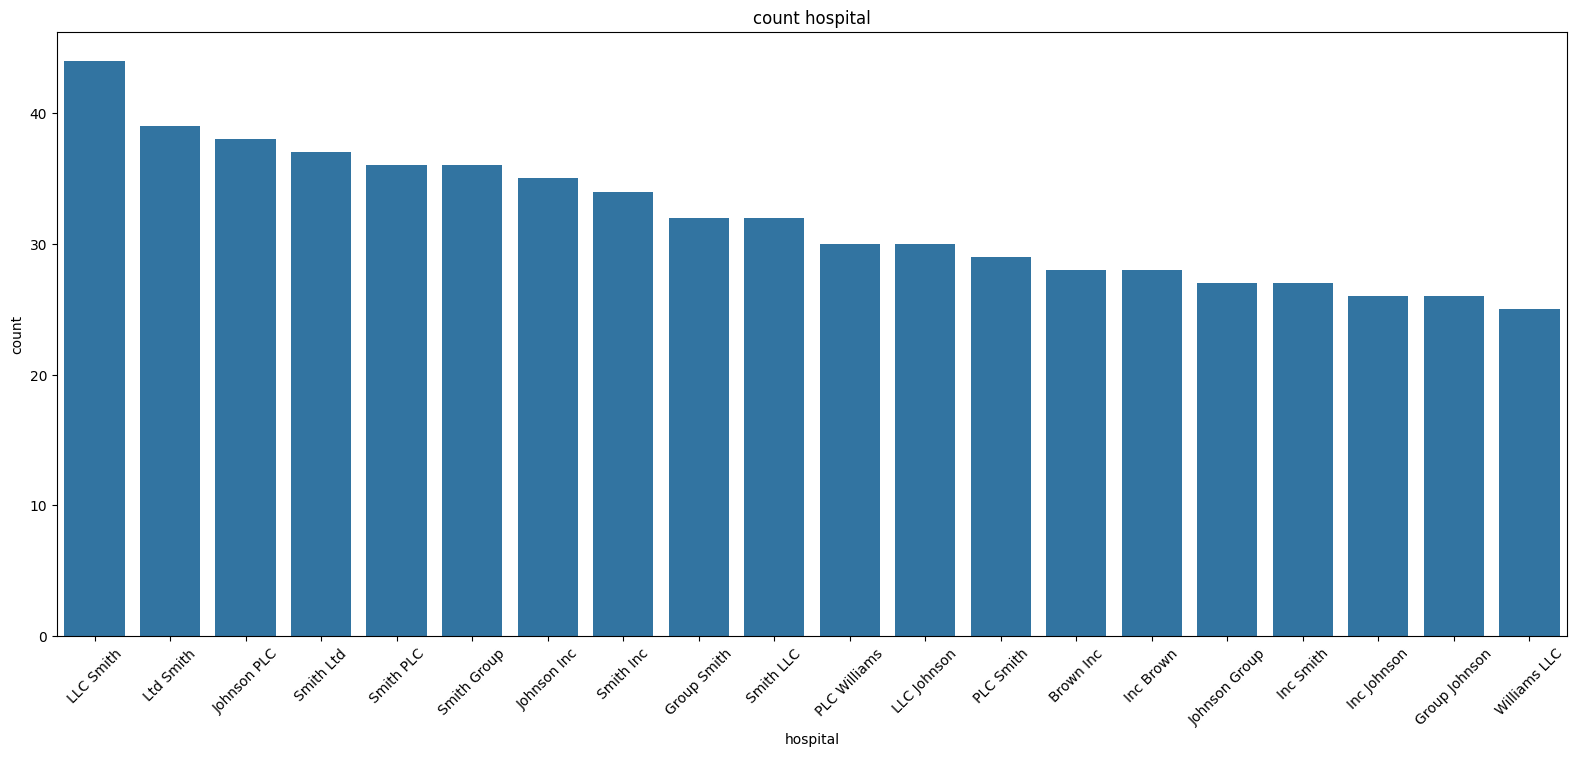

Hospital
Hernandez-Morton                  52373.032374
Walker-Garcia                     52170.036854
Ruiz-Anthony                      52154.237722
George-Gonzalez                   52102.240889
Rocha-Carter                      52092.669896
Briggs Walker Martinez, and       52024.726443
and Small Stephens Harrington,    51975.968135
Clark-Espinoza                    51848.201597
Pierce and Miller James,          51722.122739
Stephens Ltd                      51714.300871
Lester-Park                       51661.012033
Stein-Watts                       51634.099835
Thomas, Clark and Keith           51633.858435
Baker, Weber Patton and           51587.936817
Bowman-Jimenez                    51567.277671
Perez-Wagner                      51531.964563
Brewer-Washington                 51415.257872
Cabrera-Baker                     51350.512806
Santiago and Russo, Wood          51336.221210
Group Glover                      51316.621256
Name: Billing Amount, dtype: float64


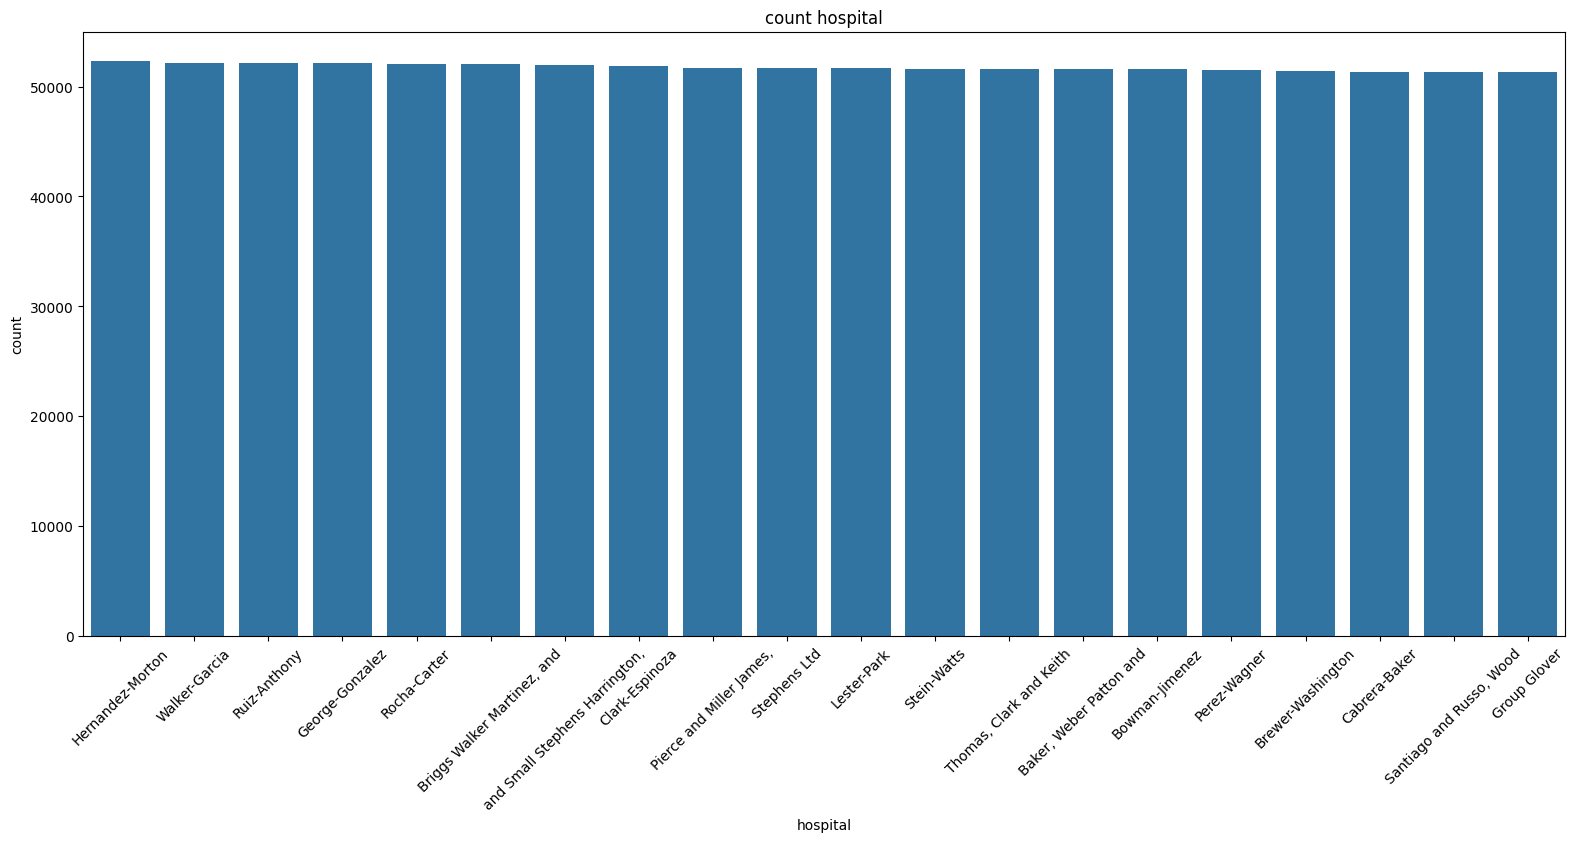

Hospital
Cooper Brown Parks, and        87.0
Gray-Solomon                   87.0
Holmes and Howard Castro,      87.0
Moore-Gray                     87.0
and Martin, Davidson Cox       87.0
and Miller, Olson Olson        87.0
and Perez, Bennett Townsend    87.0
Bates Gomez, and Larson        86.5
Calderon and Sons              86.5
Chaney, Cook Tyler and         86.5
Jones Welch and Schmidt,       86.5
Mitchell-Berg                  86.5
Morales-Anderson               86.5
Poole Shannon, and Robles      86.5
Sons and Johnston              86.5
and Hernandez Willis, Burke    86.5
Boone Allen, Ortiz and         86.0
Brooks-Martinez                86.0
Byrd-Porter                    86.0
Cain and Gay Thomas,           86.0
Name: Age, dtype: float64


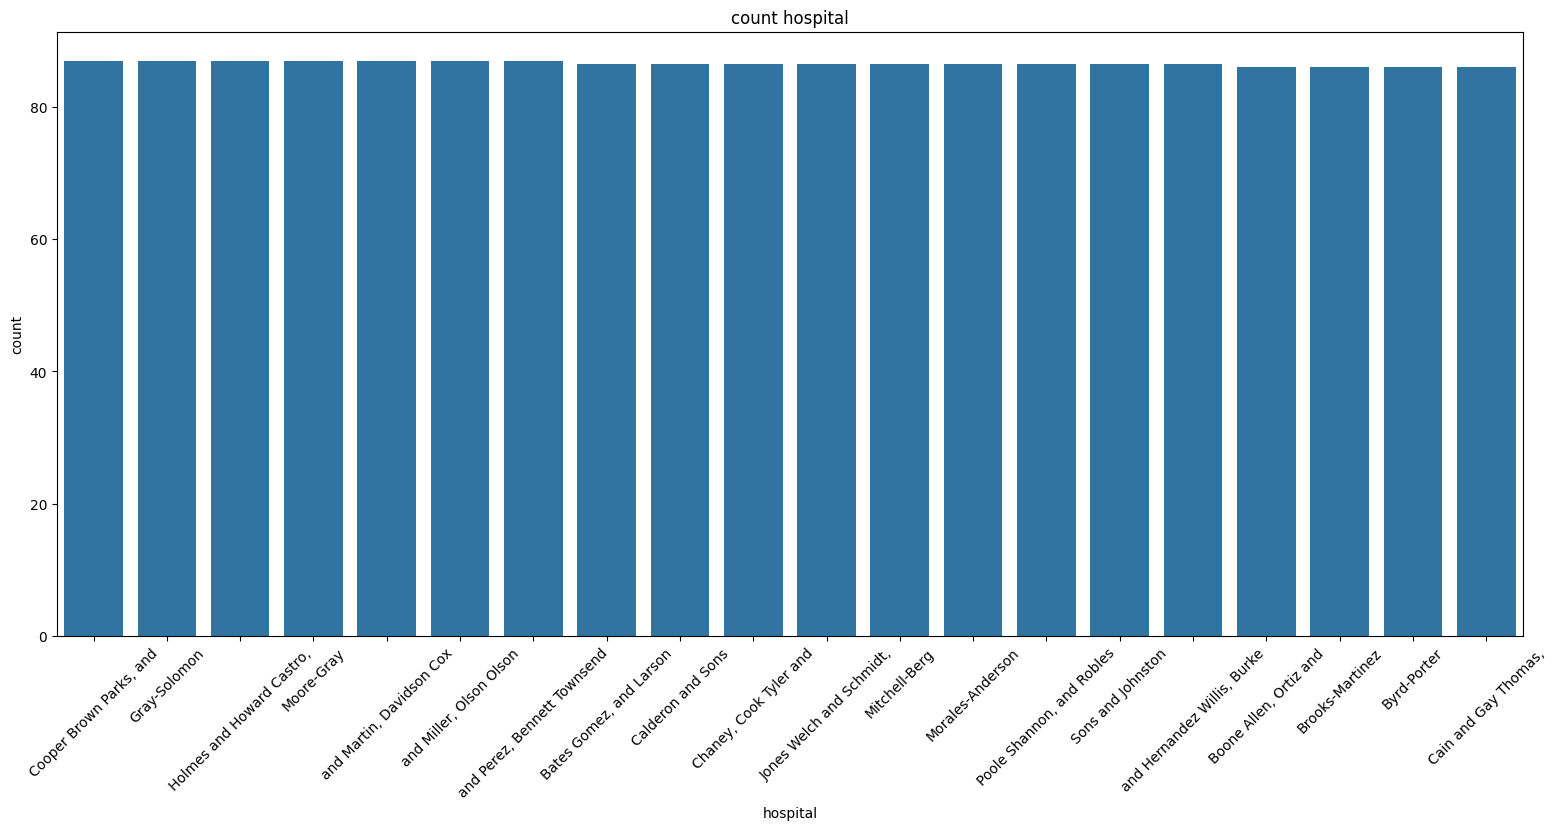

In [12]:

data_hospital = data['Hospital'].value_counts().nlargest(20)
mean_hospital = data.groupby('Hospital')['Billing Amount'].mean().nlargest(20)
med_hospital = data.groupby('Hospital')['Age'].median().nlargest(20)
var_data_col = [data_hospital , mean_hospital , med_hospital]
for var in var_data_col:
    print(var)
    plot_bar_chart(var.index , var.values , 'hospital')


- The name "Smith" appears in most of the top hospitals, indicating a large medical network under that name.Similarly, "Johnson" is also a common hospital name in the top list, reflecting a wide-reaching healthcare brand.No single hospital dominates overwhelmingly, suggesting a fairly balanced distribution of patients across institutions.

- All hospitals listed have billing averages above 51,000.Indicates possibly more complex or high-cost services.

- All listed hospitals have an average patient age above 86 years.This could indicate a focus on geriatric care or chronic condition management.